<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [185]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovateable:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [186]:
house = pd.read_csv('./housing.csv')

## Looking at the data

In [187]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [188]:
house.shape

(1460, 81)

## Options Display

In [189]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500


## The target

In [190]:
y_target = house[['SalePrice']]

In [191]:
house.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

## Working on the residential house

In [192]:
house_residential = house.copy() #I want keep an immaculate copy of the original dataframe

In [193]:
house_residential.MSZoning.value_counts() #From the data description I know I have 7 possible value, but from the description only 5 came out


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [194]:
house_residential = house_residential[house.MSZoning!='C (all)'] #Keeping only the residential houses

In [195]:
house_residential.shape

(1450, 81)

In [196]:
house_residential.pop('Id') #dropping Id

0          1
1          2
2          3
3          4
4          5
5          6
6          7
7          8
8          9
9         10
10        11
11        12
12        13
13        14
14        15
15        16
16        17
17        18
18        19
19        20
20        21
21        22
22        23
23        24
24        25
25        26
26        27
27        28
28        29
29        30
31        32
32        33
33        34
34        35
35        36
36        37
37        38
38        39
39        40
40        41
41        42
42        43
43        44
44        45
45        46
46        47
47        48
48        49
49        50
50        51
51        52
52        53
53        54
54        55
55        56
56        57
57        58
58        59
59        60
60        61
61        62
62        63
63        64
64        65
65        66
66        67
67        68
68        69
69        70
70        71
71        72
72        73
73        74
74        75
75        76
76        77
77        78

# Making a list of the renovable variable

In [197]:
renov_feat = ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'BsmtCond', 
              'BsmtFinType1','BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 
              'KitchenQual', 'Functional', 'GarageFinish', 'GarageQual', 'GarageCond', 'MiscVal', 'FireplaceQu', 'PoolQC']


In [198]:
house_residential_fixed = house_residential.drop(renov_feat, axis=1) #keeping just the fixed features


In [199]:
house_residential_fixed.shape #My new dataframe just with the fixed features

(1450, 58)

In [200]:
house_residential_fixed.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,BrkFace,196.0,PConc,Gd,No,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,Attchd,2003.0,2,548,Y,0,61,0,0,0,0,NaN,NaN,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,None,0.0,CBlock,Gd,Gd,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,Attchd,1976.0,2,460,Y,298,0,0,0,0,0,NaN,NaN,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,BrkFace,162.0,PConc,Gd,Mn,486,0,434,920,920,866,1786,1,0,2,1,3,1,6,1,Attchd,2001.0,2,608,Y,0,42,0,0,0,0,NaN,NaN,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,None,0.0,BrkTil,TA,No,216,0,540,756,961,756,1717,1,0,1,0,3,1,7,1,Detchd,1998.0,3,642,Y,0,35,272,0,0,0,NaN,NaN,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,BrkFace,350.0,PConc,Gd,Av,655,0,490,1145,1145,1053,2198,1,0,2,1,4,1,9,1,Attchd,2000.0,3,836,Y,192,84,0,0,0,0,NaN,NaN,12,2008,WD,Normal,250000


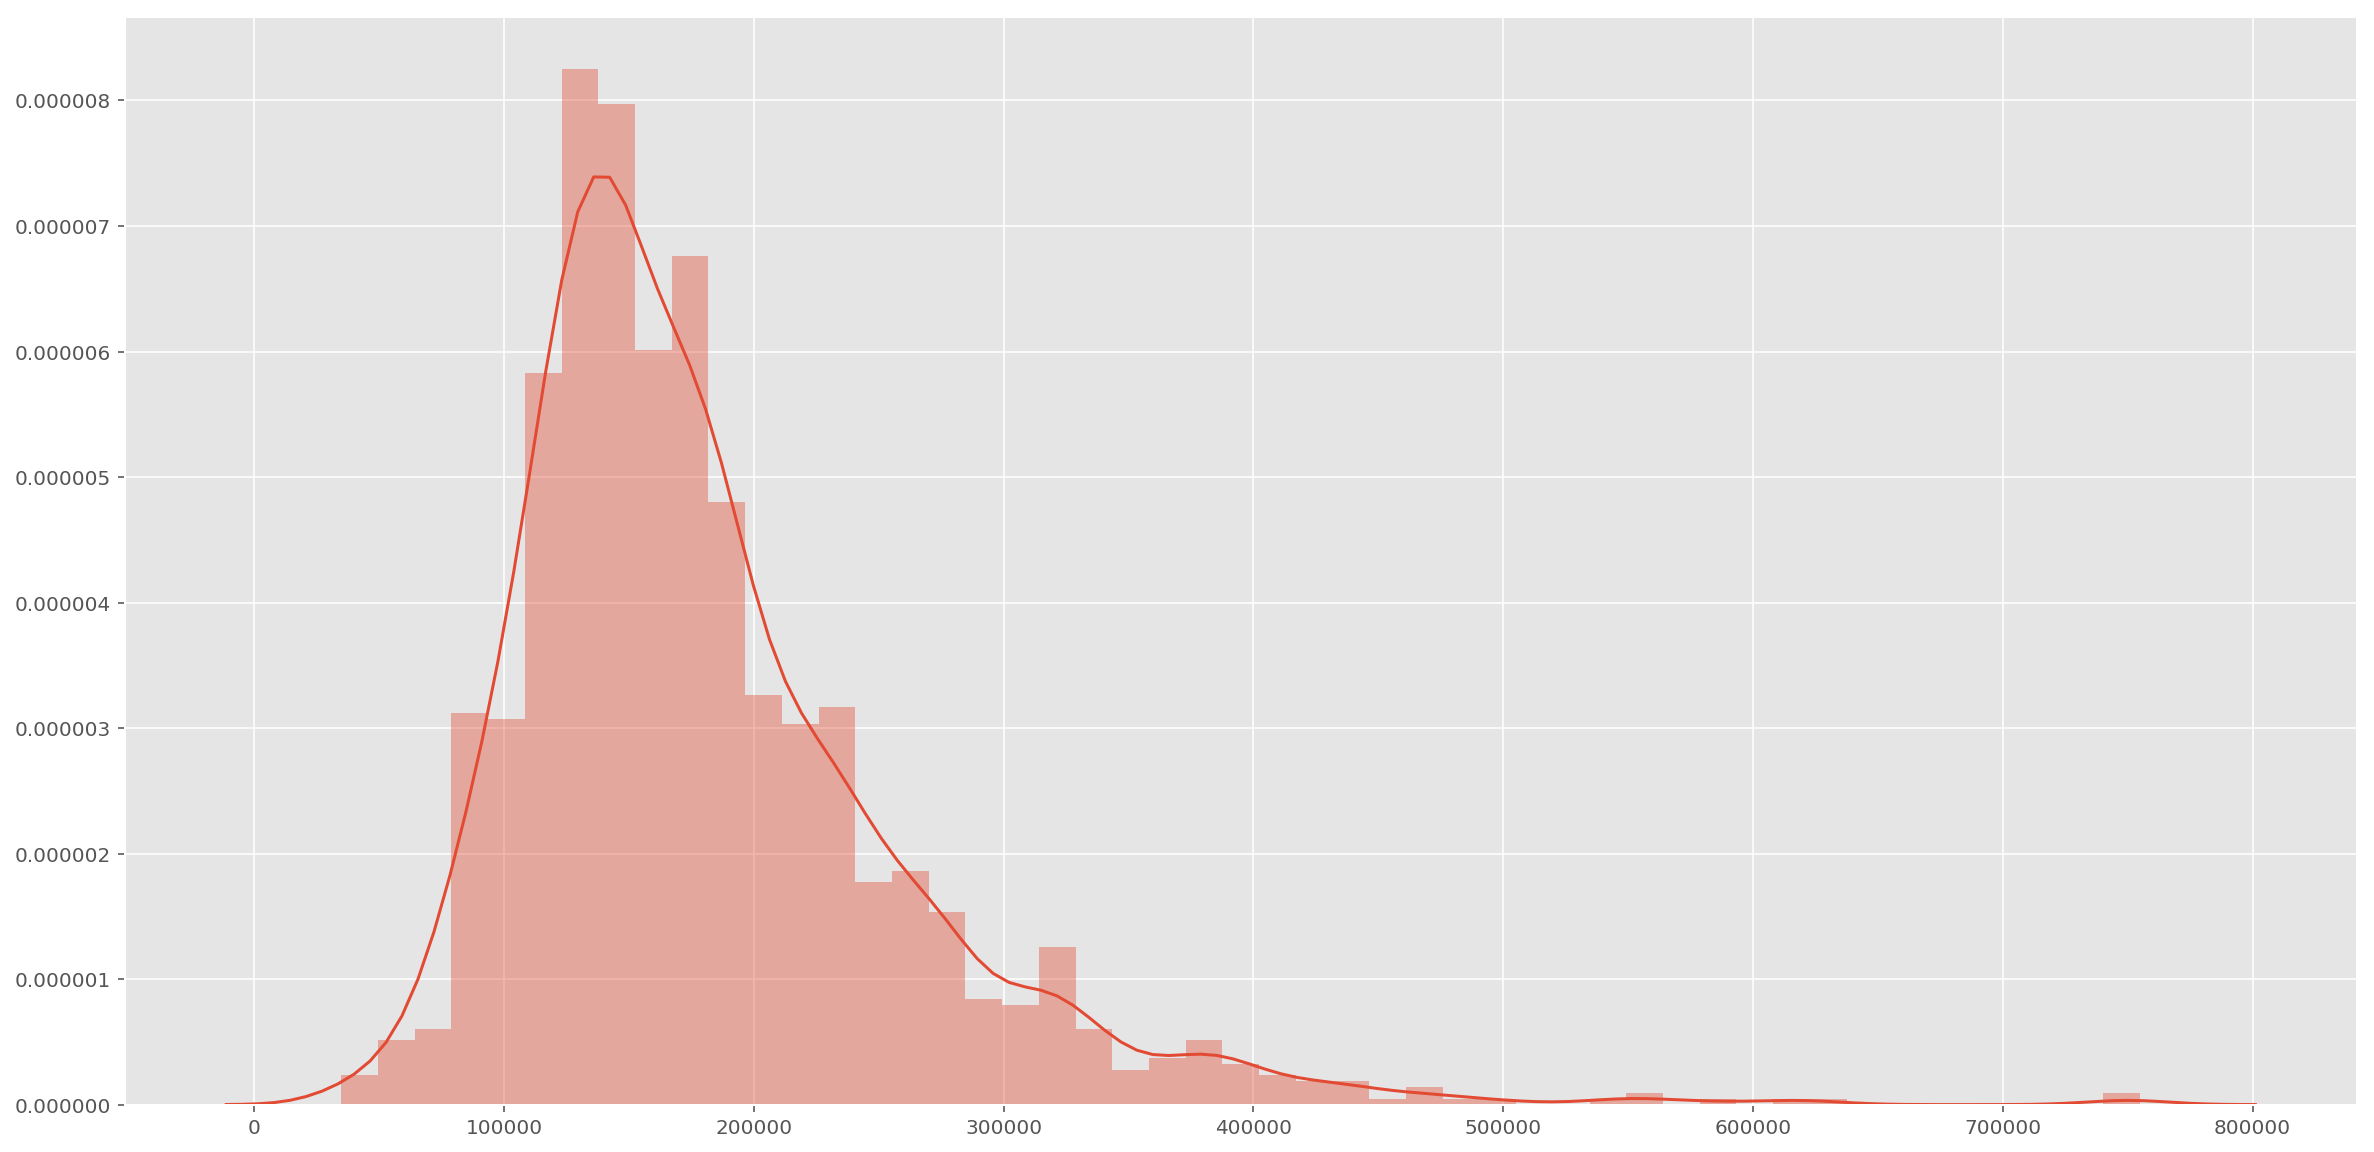

In [201]:
fig = plt.figure(figsize=(20,10))
sns.distplot(y_target)#Checking the distribution of our target
plt.show()

My target has strong skew, but it shouldn't affect my results

# Correlation between the features and the target

In [202]:
correlation = house_residential_fixed.corr() #Checking the correlation between the variables, with the target included

In [203]:
mask = np.zeros_like(house_residential_fixed.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)


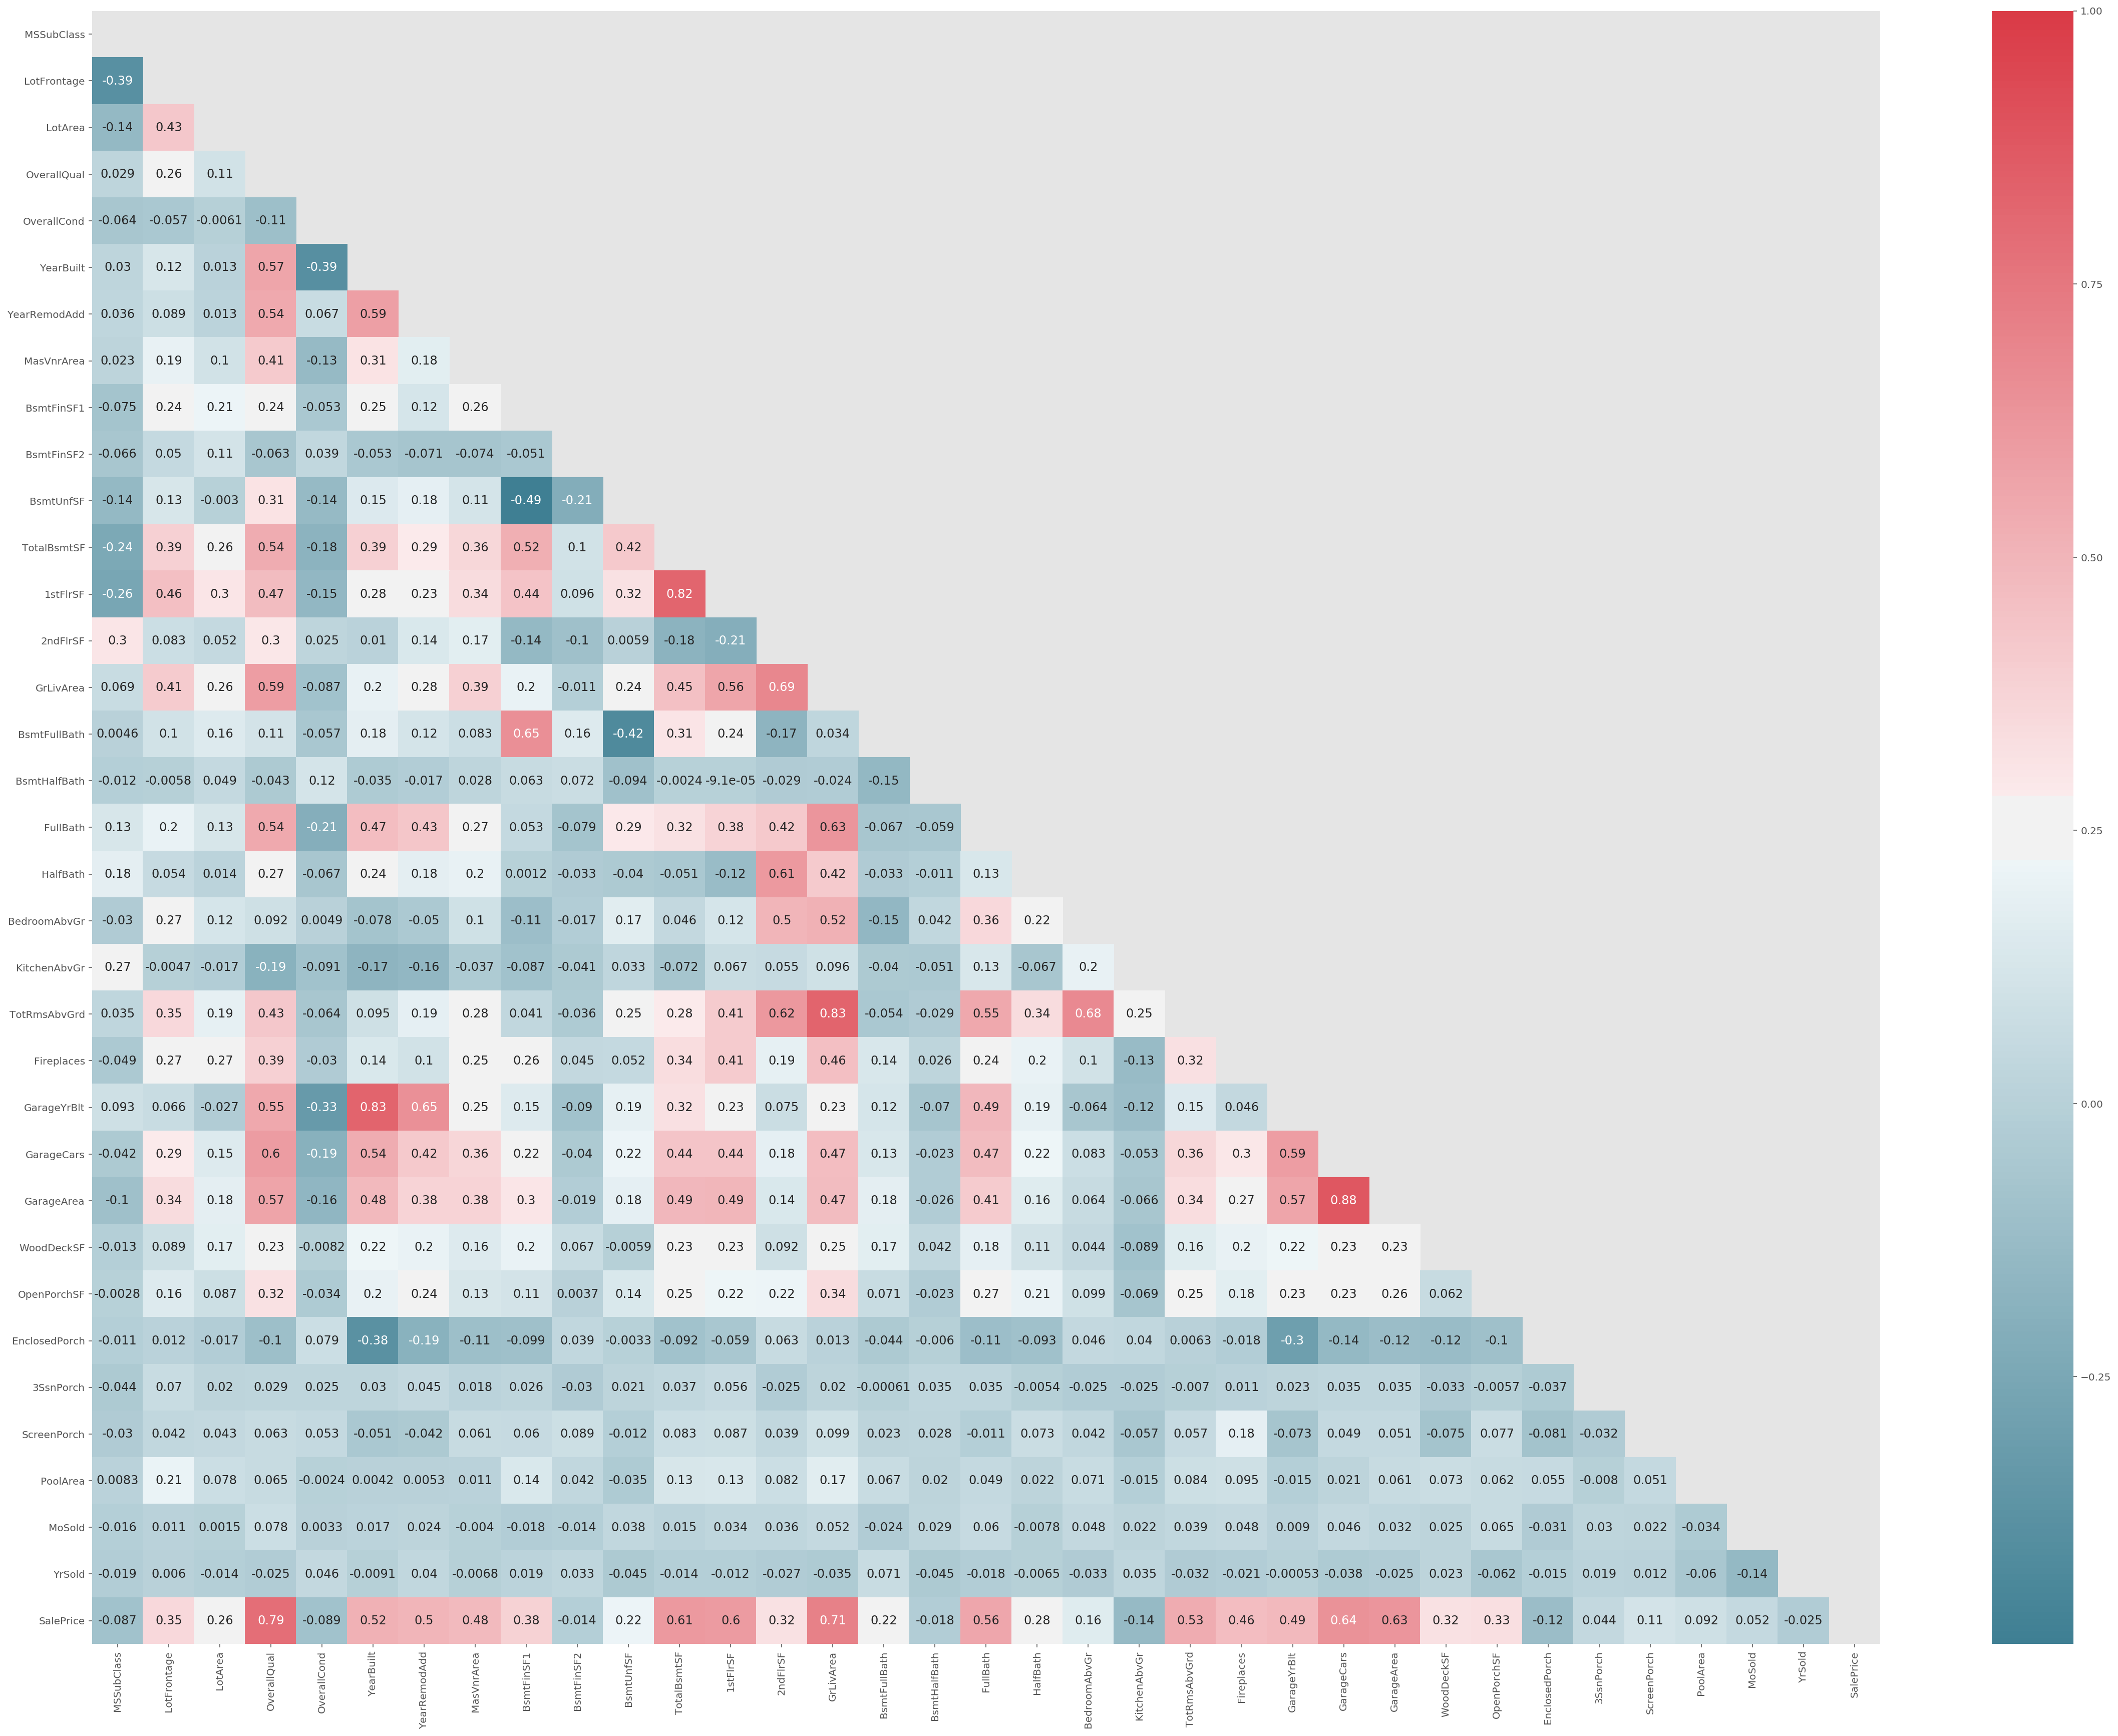

In [204]:
plt.figure(figsize=(40,30))
sns.heatmap(correlation,mask=mask,cmap=cmap, annot=True, annot_kws={"size": 12})
plt.show()

In [205]:
#Correlation with the target
correlation_Sale = correlation.loc[['SalePrice']].T 

In [206]:
correlation_Sale

,SalePrice
MSSubClass,-0.087487
LotFrontage,0.354848
LotArea,0.264715
OverallQual,0.789031
OverallCond,-0.089084
YearBuilt,0.517602
YearRemodAdd,0.501186
MasVnrArea,0.475950
BsmtFinSF1,0.384475
BsmtFinSF2,-0.014145


In [207]:
correlation_threshold = correlation.loc[['SalePrice']].T.abs().sort_values(by='SalePrice', ascending=False)


In [208]:
#Strongest features with the target
correlation_threshold.head(10)

,SalePrice
SalePrice,1.000000
OverallQual,0.789031
GrLivArea,0.708658
GarageCars,0.642135
GarageArea,0.629831
TotalBsmtSF,0.612088
1stFlrSF,0.603300
FullBath,0.556674
TotRmsAbvGrd,0.533355
YearBuilt,0.517602


# Creation of the Databases and EDA

In [209]:
#Keeping only the variable with high correlation for this dataframe
#I am going to check the results between the whole dataframe with fixed variables and the dataframe with higher correlation
list_variable = list(correlation_threshold[correlation_threshold.SalePrice > 0.3].index ) 

In [210]:
list_variable.append('YrSold')     #Adding the variable YrSold

In [211]:
house_residential_fixed[list_variable].dtypes

SalePrice         int64
OverallQual       int64
GrLivArea         int64
GarageCars        int64
GarageArea        int64
TotalBsmtSF       int64
1stFlrSF          int64
FullBath          int64
TotRmsAbvGrd      int64
YearBuilt         int64
YearRemodAdd      int64
GarageYrBlt     float64
MasVnrArea      float64
Fireplaces        int64
BsmtFinSF1        int64
LotFrontage     float64
OpenPorchSF       int64
WoodDeckSF        int64
2ndFlrSF          int64
YrSold            int64
dtype: object

In [212]:
#Fixing the missing value before to split the dataframes
# GarageYrBlt = There is no Garage, but I will put the year of the house
# MasVnrArea = There is no Masonery so I will put the value 0
# LotFrontage = I think is a missing value, so I will use the median from the feature

In [213]:
house_residential_fixed.GarageYrBlt = house_residential_fixed['GarageYrBlt'].fillna(house_residential_fixed.YearBuilt)#, inplace=True)
house_residential_fixed.MasVnrArea = house_residential_fixed.MasVnrArea.fillna(value=0.0)
house_residential_fixed.LotFrontage = house_residential_fixed.LotFrontage.fillna(value=house_residential_fixed.LotFrontage.median())


In [214]:
house_residential_fixed[list_variable].isnull().sum() #Checking missing values in subset of the variables with high correlation

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MasVnrArea      0
Fireplaces      0
BsmtFinSF1      0
LotFrontage     0
OpenPorchSF     0
WoodDeckSF      0
2ndFlrSF        0
YrSold          0
dtype: int64

In [215]:
#Checking the rest of the variables from the bigger DataFrame

In [216]:
house_residential_fixed.isnull().sum()[house_residential_fixed.isnull().sum()!=0] #Checking the missing values in the whole dataframe

Alley           1361
MasVnrType         8
BsmtQual          37
BsmtExposure      38
GarageType        79
Fence           1172
MiscFeature     1398
dtype: int64

In [217]:
#Checking one by one the columns of missing values 
#In all the cases the missing values means that the feature is not present in the house
#I replace the Nan with a string

In [218]:
house_residential_fixed.Alley = house_residential_fixed.Alley.fillna(value='No Alley')
house_residential_fixed.MasVnrType = house_residential_fixed.MasVnrType.fillna(value='None')
house_residential_fixed.BsmtQual = house_residential_fixed.BsmtQual.fillna(value='No Basement')
house_residential_fixed.BsmtExposure = house_residential_fixed.BsmtExposure.fillna(value='No Basement')
house_residential_fixed.GarageType = house_residential_fixed.GarageType.fillna(value='No Garage')
house_residential_fixed.Fence = house_residential_fixed.Fence.fillna(value='No Fence')
house_residential_fixed.MiscFeature = house_residential_fixed.MiscFeature.fillna(value='None')



In [219]:
house_residential_fixed.isnull().sum()[house_residential_fixed.isnull().sum()!=0] #Checking the missing values in the whole dataframe


Series([], dtype: int64)

In [220]:
house_variable = house_residential_fixed[list_variable] #Creating a new dataframe just with the variable with high correlation


In [221]:
house_residential_fixed_dummy = pd.get_dummies(house_residential_fixed, drop_first=True) #Creating a new dataframe with all the fixed variables and dummy variable when it is possible


In [222]:
#Checking my new Dataframe with Dummy variables
house_residential_fixed_dummy.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,2,2008,208500,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,5,2007,181500,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,9,2008,223500,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,2,2006,140000,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,12,2008,250000,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0

In [223]:
#Make dummy also in other 3 numerical categorical variables 
house_residential_fixed_dummy = pd.get_dummies(house_residential_fixed_dummy, columns = ['MSSubClass'],drop_first=True)#, 'OverallQual', 'OverallCond'], drop_first=True) #Creating a new dataframe with all the fixed variables and dummy variable when it is possible


I will work with 2 dataframes: 

1) house_variable which contain only the variable with high correlation with SalePrice

2) house_residential_fixed_dummy which contain all the sixed variables

# Train/Test for the small Dataframe

In [224]:
#Train/Test for the small Dataframe

In [225]:
target = 'SalePrice'
house_variable_train = house_variable[house_variable['YrSold'] < 2010].drop([target, 'YrSold'], axis=1)
house_variable_test = house_variable[house_variable['YrSold'] == 2010].drop([target, 'YrSold'], axis =1)
y_target_train = house_variable[house_variable['YrSold'] < 2010][target]
y_target_test = house_variable[house_variable['YrSold'] == 2010][target]


In [226]:
#Train/Test for the big Dataframe

In [227]:
house_residential_fixed_train = house_residential_fixed_dummy[house_residential_fixed_dummy['YrSold'] < 2010].drop([target, 'YrSold'], axis=1)
house_residential_fixed_test = house_residential_fixed_dummy[house_residential_fixed_dummy['YrSold'] == 2010].drop([target, 'YrSold'], axis=1)
y_resindetial_target_train = house_residential_fixed_dummy[house_residential_fixed_dummy['YrSold'] < 2010][target]
y_resindetial_target_test = house_residential_fixed_dummy[house_residential_fixed_dummy['YrSold'] == 2010][target]


In [228]:
#importing

In [229]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold


In [230]:
#Normal Standardization on the 2 dataframes

In [231]:
scaler = StandardScaler()

In [232]:
X_train = pd.DataFrame(scaler.fit_transform(house_variable_train), columns=house_variable_train.columns)
X_test = pd.DataFrame(scaler.transform(house_variable_test), columns=house_variable_test.columns)

In [233]:
X_train_all = pd.DataFrame(scaler.fit_transform(house_residential_fixed_train), columns=house_residential_fixed_train.columns)
X_test_all = pd.DataFrame(scaler.transform(house_residential_fixed_test), columns=house_residential_fixed_test.columns)


In [234]:
kf = KFold(n_splits=10,shuffle=False,random_state=1)

In [235]:
def model_fitter(model, X_train, y_train, X_test, y_test, cv=kf):
    model.fit(X_train, y_train)
    cv_score = (np.mean(cross_val_score(model, X_train, y_train, cv=kf)))
    training_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return cv_score, training_score, test_score

In [236]:
#Calling Linear Regresion standard my variable

In [237]:
model_linear = LinearRegression()
mean_score_linear, linear_training_score, linear_test_score = model_fitter(model_linear, X_train, y_target_train, X_test, y_target_test)
print("Mean cross-validated training score:", mean_score_linear)
print("Training Score:", linear_training_score)
print("Test Score:", linear_test_score)


Mean cross-validated training score: 0.7708202216308135
Training Score: 0.787012677945575
Test Score: 0.8141316252692166


In [238]:
model_linear_all = LinearRegression()
mean_score_linear_all, linear_training_score_all, linear_test_score_all = model_fitter(model_linear, X_train_all, y_resindetial_target_train, X_test_all, y_resindetial_target_test)
print("Mean cross-validated training score:", mean_score_linear_all)
print("Training Score:", linear_training_score_all)
print("Test Score:", linear_test_score_all)


Mean cross-validated training score: -2.675210925019471e+22
Training Score: 0.8872234745374162
Test Score: 0.8845459758249236


In [239]:
#RIDGE METHOD

In [240]:
#Checking the best alpha for Ridge method for small dataframe
model_RidgeCV = RidgeCV(alphas=np.logspace(0, 5, 100), cv=kf)
model_RidgeCV.fit(X_train, y_target_train)
#Finding the score using Ridge method
model_Ridge = Ridge(model_RidgeCV.alpha_)
mean_score_Ridge, Ridge_training_score, Ridge_test_score = model_fitter(model_Ridge, X_train, y_target_train, X_test, y_target_test)
print("Mean cross-validated training score:", mean_score_Ridge)
print("Training Score:", Ridge_training_score)
print("Test Score:", Ridge_test_score)

Mean cross-validated training score: 0.7758702742982692
Training Score: 0.7841377335149275
Test Score: 0.8131297511560307


In [241]:
#Checking the best alpha for Ridge method for big dataframe
model_RidgeCV_all = RidgeCV(alphas=np.logspace(0, 5, 100), cv=kf)
model_RidgeCV_all.fit(X_train_all, y_resindetial_target_train)
#Finding the score using Ridge method
model_Ridge_all = Ridge(model_RidgeCV.alpha_)
mean_score_Ridge_all, Ridge_training_score_all, Ridge_test_score_all = model_fitter(model_Ridge_all, X_train_all, y_resindetial_target_train, X_test_all, y_resindetial_target_test)
print("Mean cross-validated training score:", mean_score_Ridge_all)
print("Training Score:", Ridge_training_score_all)
print("Test Score:", Ridge_test_score_all)

Mean cross-validated training score: 0.8216296669193623
Training Score: 0.8781969567892419
Test Score: 0.8835716940125414


In [242]:
#LASSO

In [243]:
#Checking the best alpha for Lasso method for small dataframe
model_LassoCV = LassoCV(n_alphas=300, cv=kf)
model_LassoCV.fit(X_train, y_target_train)
#Finding the score using Lasso method
model_Lasso = Lasso(model_LassoCV.alpha_)
mean_score_Lasso, Lasso_training_score, Lasso_test_score = model_fitter(model_Lasso, X_train, y_target_train, X_test, y_target_test)
print("Mean cross-validated training score:", mean_score_Lasso)
print("Training Score:", Lasso_training_score)
print("Test Score:", Lasso_test_score)

Mean cross-validated training score: 0.7730284542476229
Training Score: 0.7849559167520831
Test Score: 0.8078059135510112


In [244]:
#Checking the best alpha for Lasso method for big dataframe
model_LassoCV_all = LassoCV(n_alphas=300, cv=kf)
model_LassoCV_all.fit(X_train_all, y_resindetial_target_train)
#Finding the score using Lasso method
model_Lasso_all = Lasso(model_LassoCV.alpha_)
mean_score_Lasso_all, Lasso_training_score_all, Lasso_test_score_all = model_fitter(model_Lasso_all, X_train_all, y_resindetial_target_train, X_test_all, y_resindetial_target_test)
print("Mean cross-validated training score:", mean_score_Lasso_all)
print("Training Score:", Lasso_training_score_all)
print("Test Score:", Lasso_test_score_all)

Mean cross-validated training score: 0.8174321725180818
Training Score: 0.8555318739785827
Test Score: 0.8593196030871284


In [245]:
#ELASTIC NET

In [246]:
#Checking the best alpha and ratio for Elastic Net method for small dataframe
model_ElasticNetCV = ElasticNetCV(l1_ratio=[0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                     n_alphas=300, cv=kf)
model_ElasticNetCV.fit(X_train, y_target_train)
#Finding the score using Lasso method
model_ElasticNet = ElasticNet(model_ElasticNetCV.alpha_, model_ElasticNetCV.l1_ratio_)
mean_score_ElasticNet, ElasticNet_training_score, ElasticNet_test_score = model_fitter(model_ElasticNet, X_train, y_target_train, X_test, y_target_test)
print("Mean cross-validated training score:", mean_score_ElasticNet)
print("Training Score:", ElasticNet_training_score)
print("Test Score:", ElasticNet_test_score)

Mean cross-validated training score: 0.7730284542476229
Training Score: 0.7849559167520831
Test Score: 0.8078059135510112


In [247]:
#Checking the best alpha and ratio for Elastic Net method for the big dataframe
model_ElasticNetCV_all = ElasticNetCV(l1_ratio=[0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                     n_alphas=300, cv=kf)
model_ElasticNetCV_all.fit(X_train_all, y_resindetial_target_train)
#Finding the score using Elastic Net method
model_ElasticNet_all = ElasticNet(model_ElasticNetCV_all.alpha_, model_ElasticNetCV_all.l1_ratio_)
mean_score_ElasticNet_all, ElasticNet_training_score_all, ElasticNet_test_score_all = model_fitter(model_ElasticNet_all, X_train_all, y_resindetial_target_train, X_test_all, y_resindetial_target_test)
print("Mean cross-validated training score:", mean_score_ElasticNet_all)
print("Training Score:", ElasticNet_training_score_all)
print("Test Score:", ElasticNet_test_score_all)

Mean cross-validated training score: 0.8225835607436653
Training Score: 0.8503975131933146
Test Score: 0.8635505185541389


The smaller dataframe with only the variables with high correlation with the target loose always as expected against dataframe with all the fixed features in any model.
Every model give us a good score, but the best one are the Ridge and the Linear Regression. I will choose to use Ridge as should decrease variance and Bias.

In [248]:
y_predict_Ridge = model_Ridge_all.predict(X_test_all)

Residual from the predictions

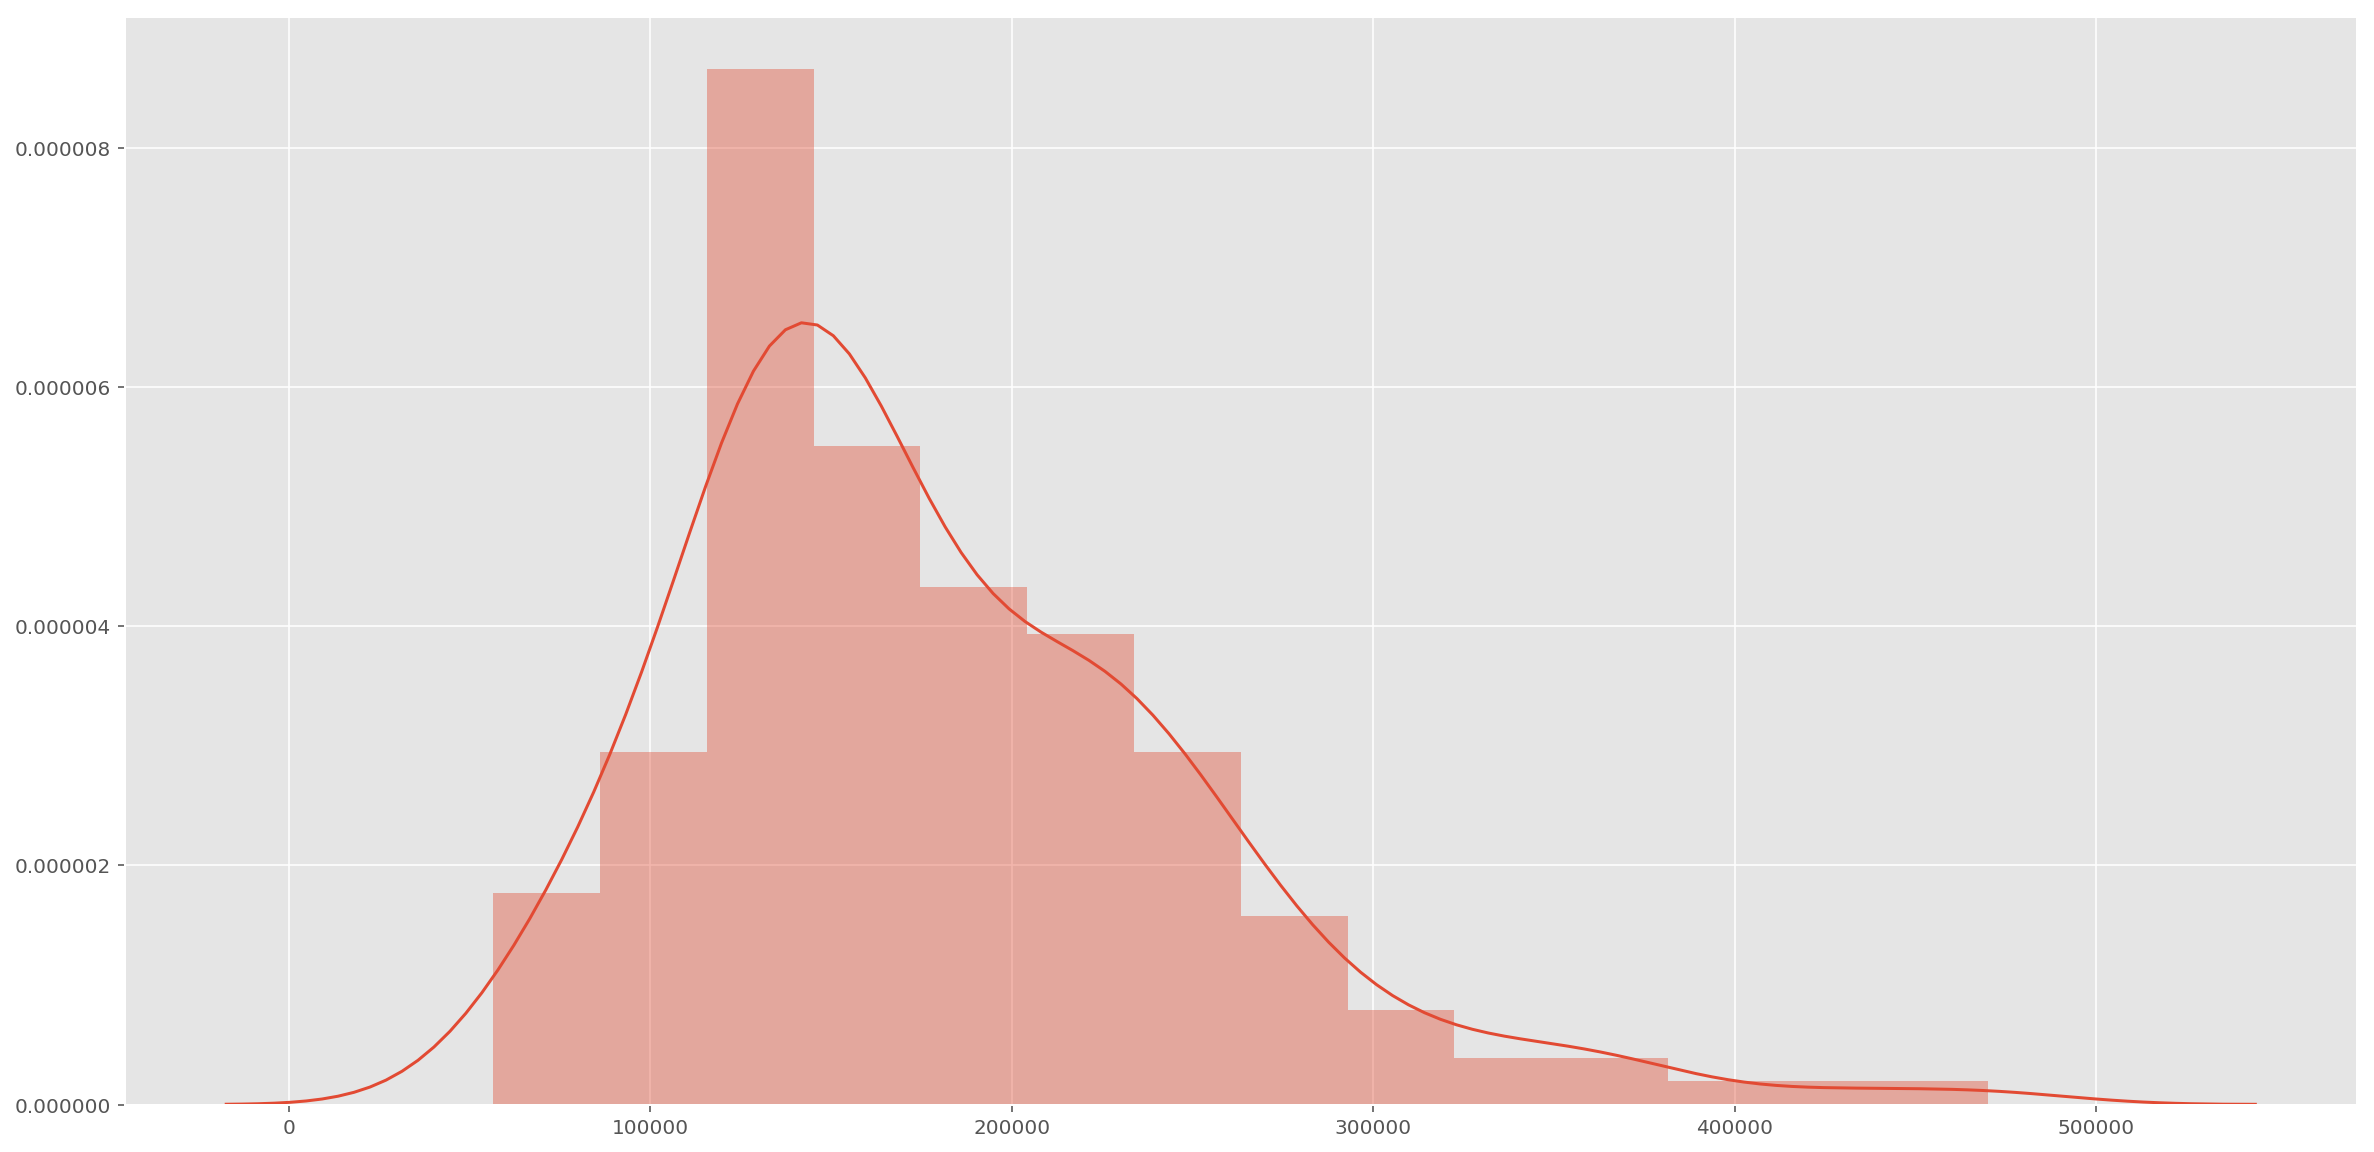

In [249]:
fig = plt.figure(figsize=(20,10))
sns.distplot(y_predict_Ridge)
plt.show()

In [250]:
residual = pd.DataFrame(list(zip(y_resindetial_target_test, y_predict_Ridge, y_resindetial_target_test-y_predict_Ridge)), 
                        columns=['True', 'Predict', 'Residual'])


In [251]:
residual

,True,Predict,Residual
0,149000,163421.454442,-14421.454442
1,154000,162232.339562,-8232.339562
2,134800,140520.514738,-5720.514738
3,306000,303995.014711,2004.985289
4,165500,165163.638013,336.361987
5,109000,132516.562423,-23516.562423
6,319900,285166.639402,34733.360598
7,110000,91979.584853,18020.415147
8,140000,135887.450780,4112.549220
9,180000,250706.293210,-70706.293210


# Plot our predictions

<Figure size 1440x2160 with 0 Axes>

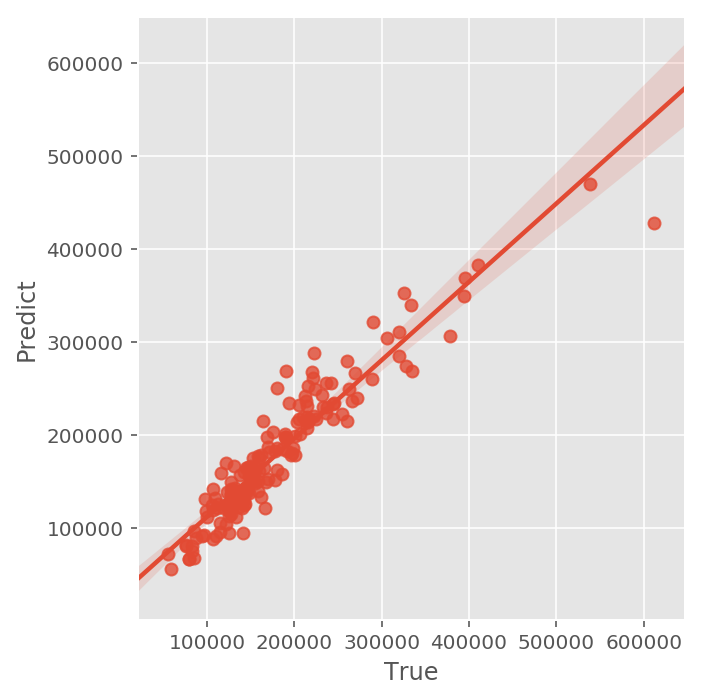

In [252]:
fig = plt.figure(figsize=(20,30))
sns.lmplot(x='True', y='Predict', data=residual)
plt.show()

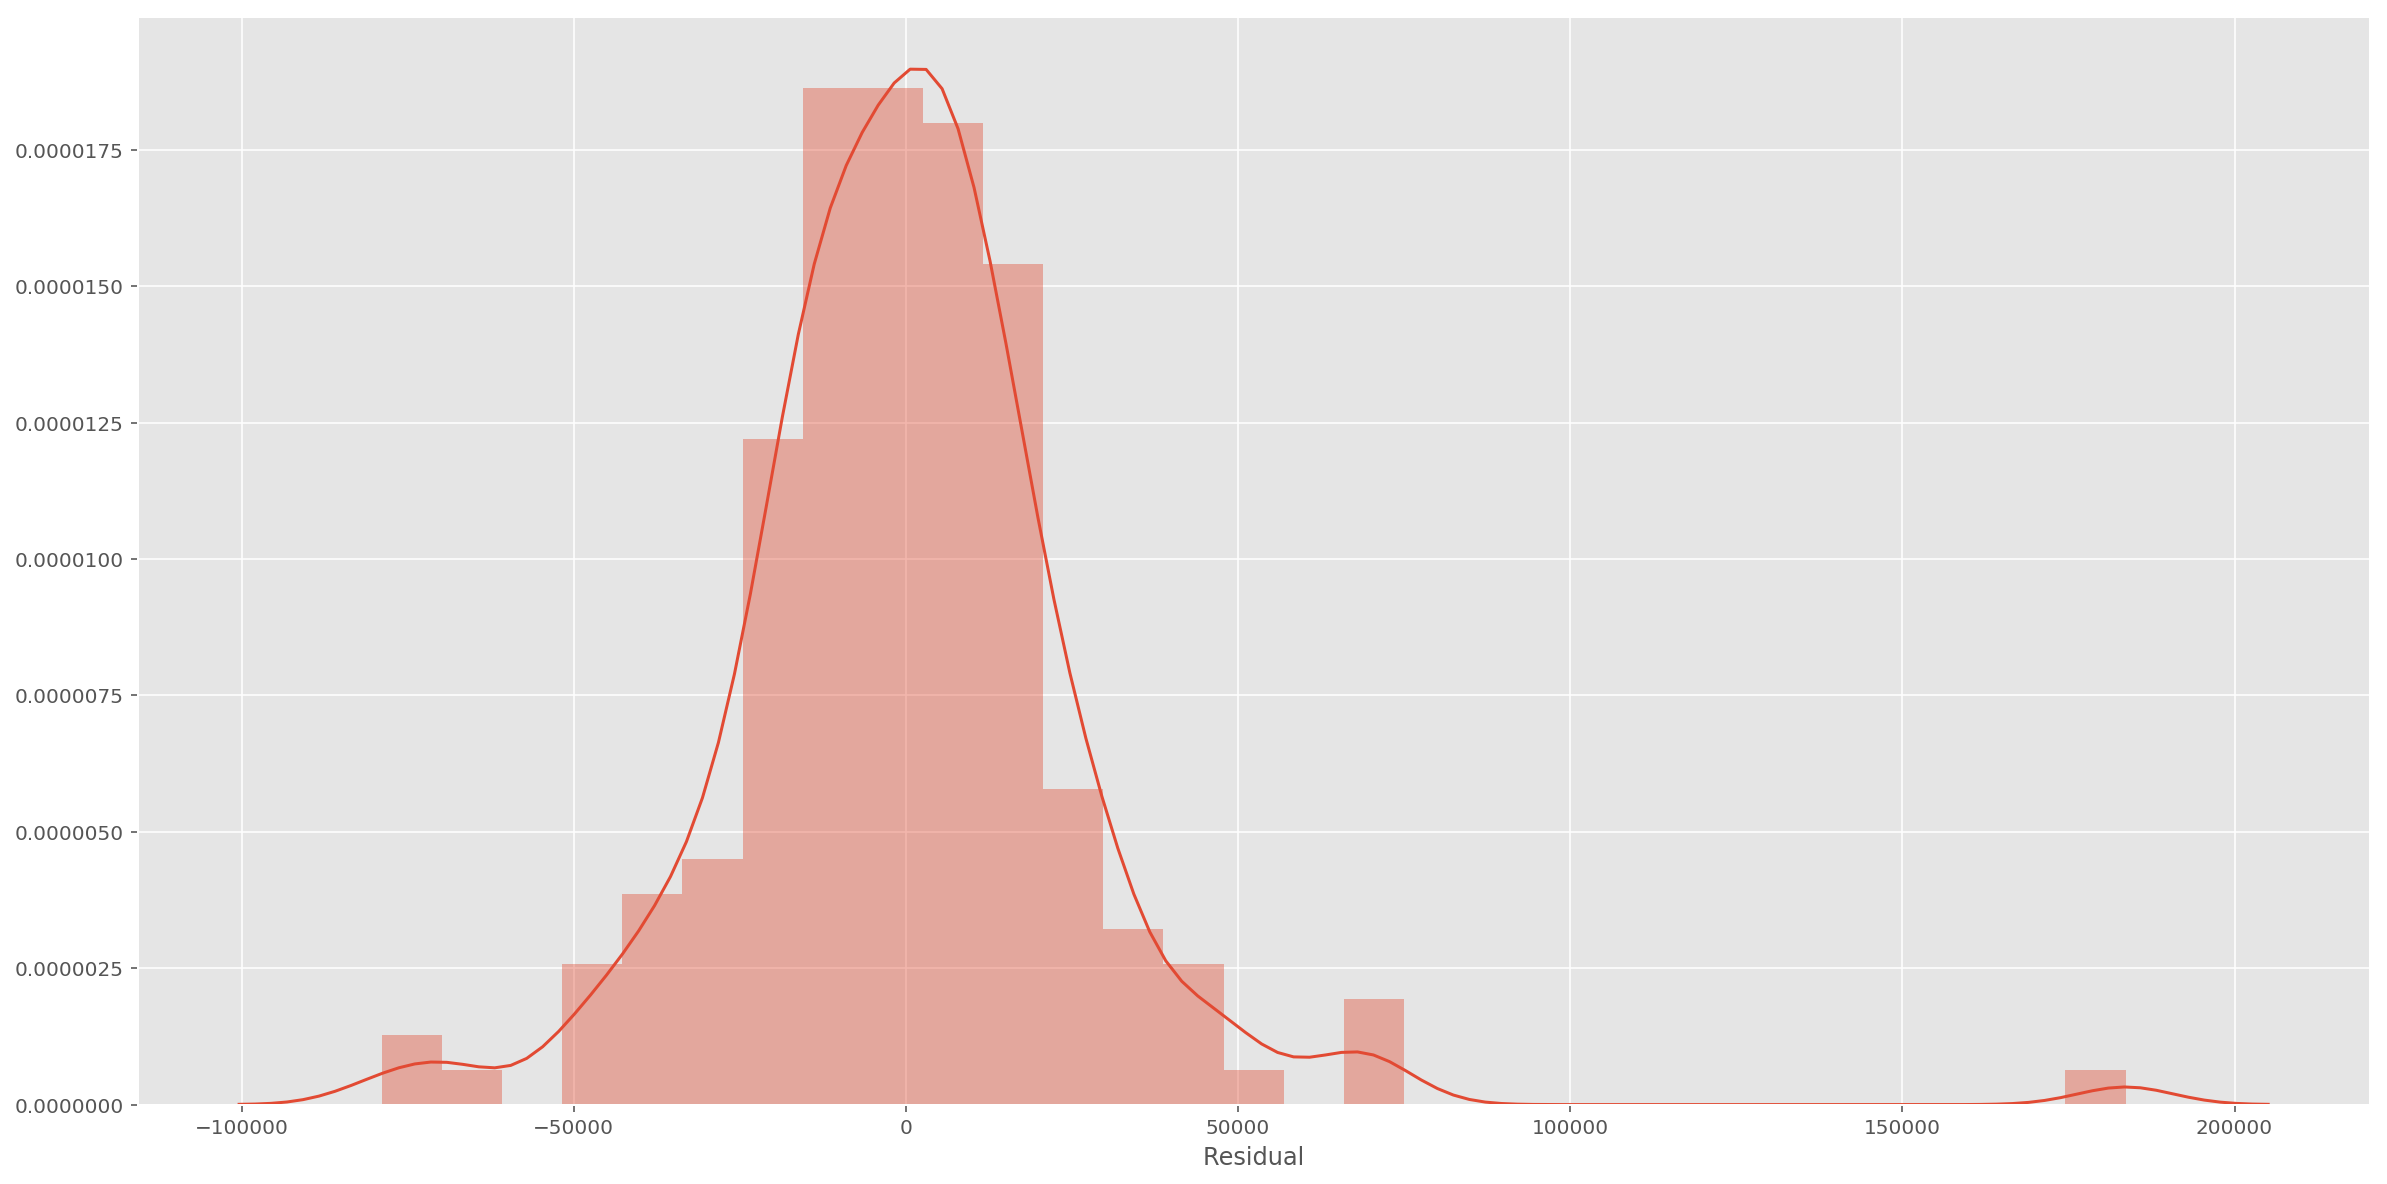

In [253]:
fig = plt.figure(figsize=(20,10))
sns.distplot(residual.Residual)

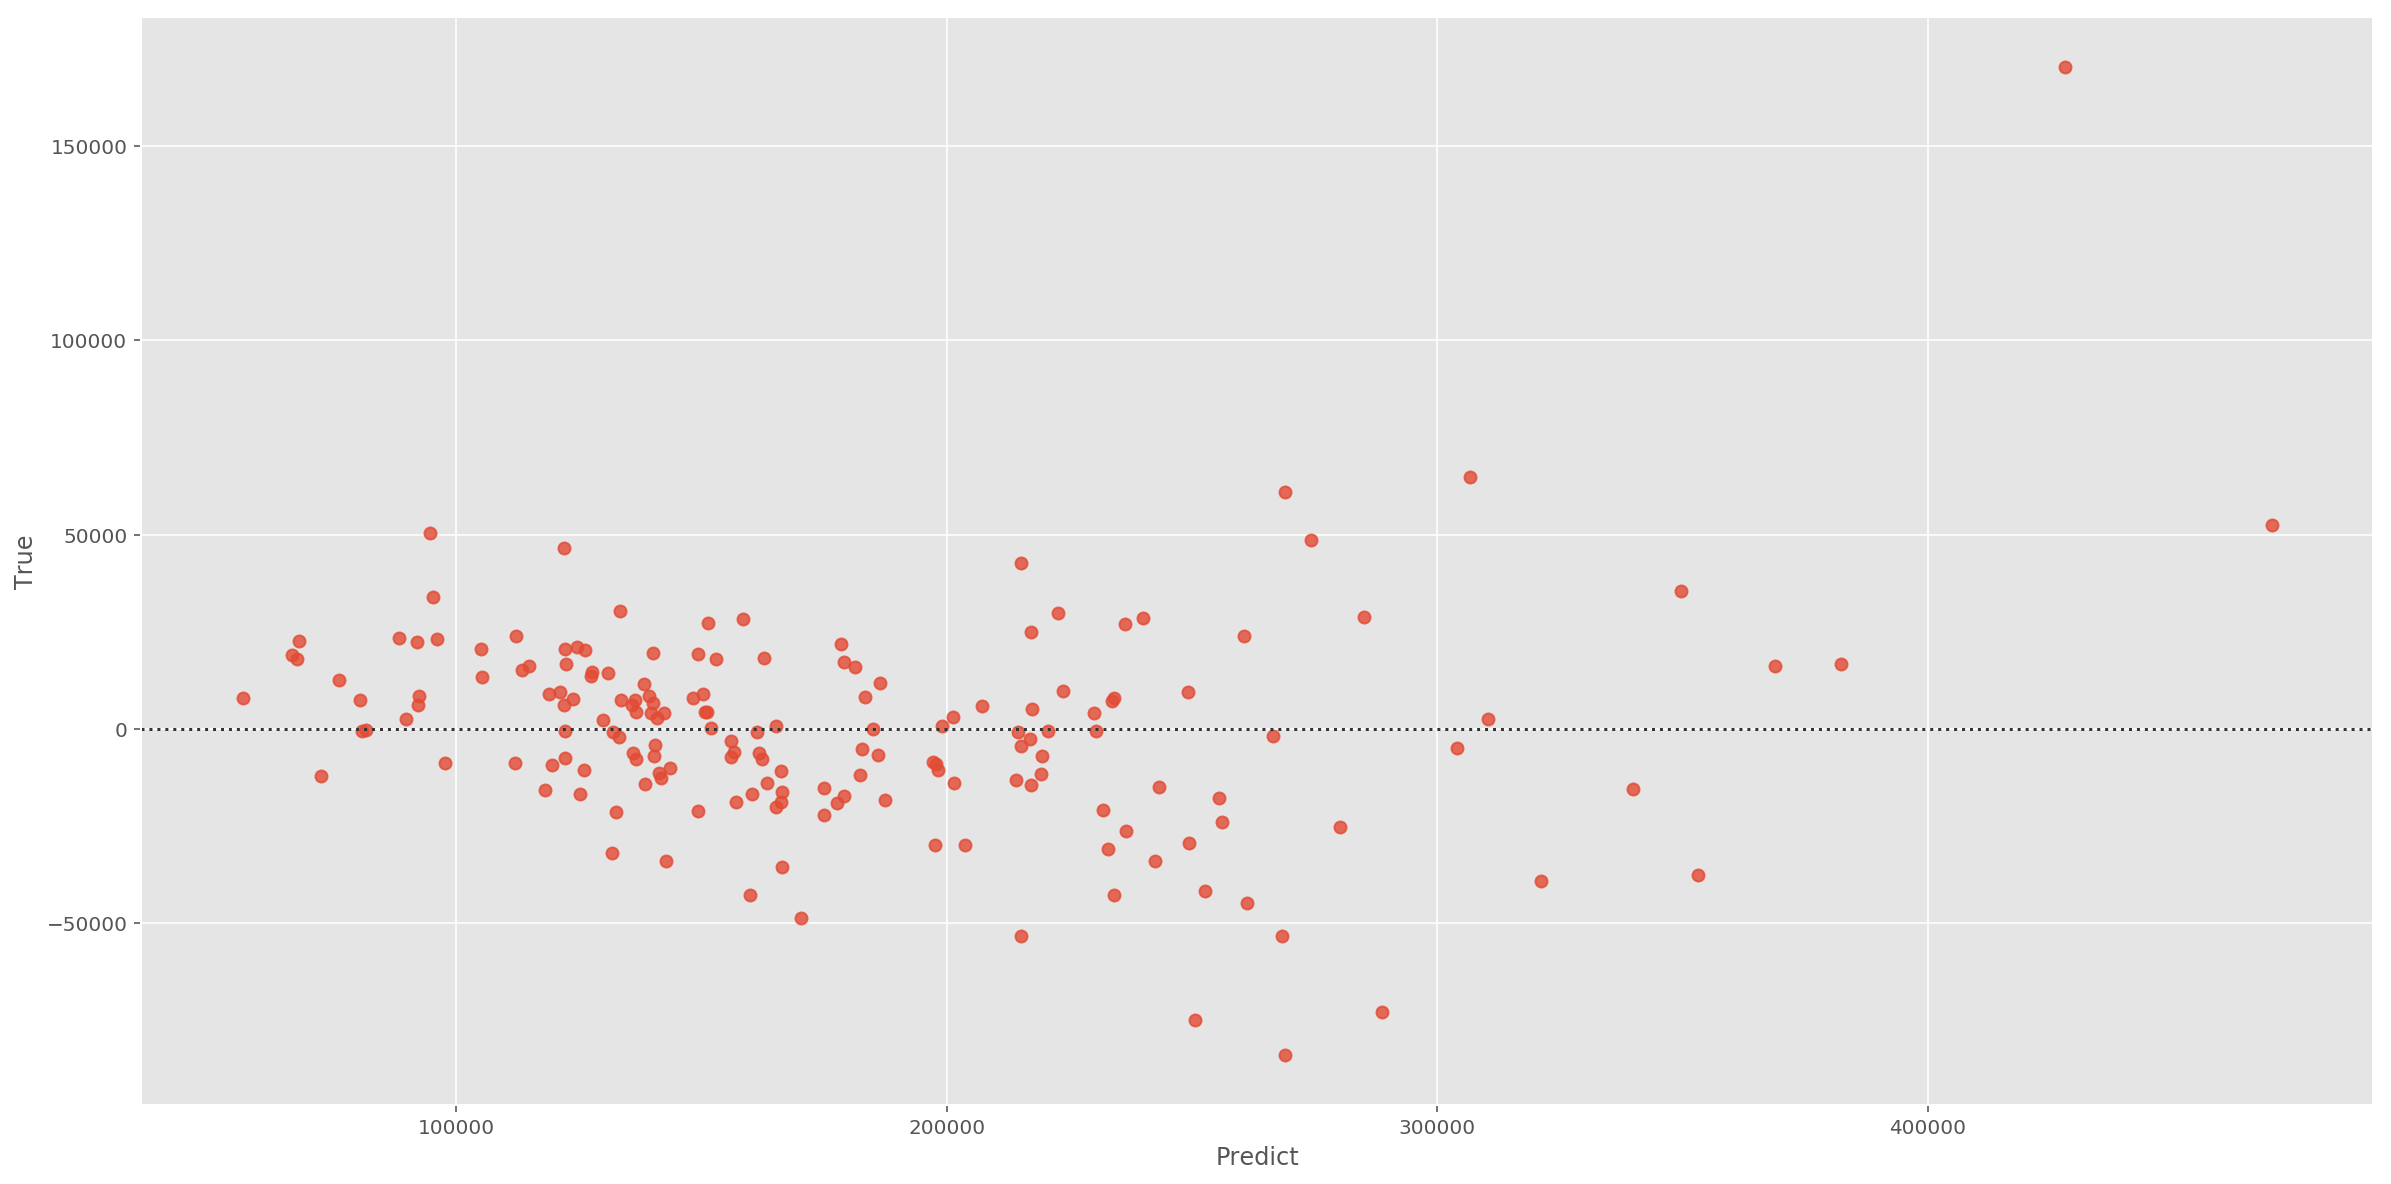

In [254]:
plt.figure(figsize=(20,10))
sns.residplot(x='Predict', y='True', data=residual)

The graph between the True value and the Predict value is pretty linear, showing that our results are consistents. 
We can see few outliers when the Sale Price is very high

## Coefficient

In [255]:
#model_Ridge_all.coef_

In [256]:
Coefficient = pd.DataFrame(list(zip(X_test_all.columns,model_Ridge_all.coef_, np.abs(model_Ridge_all.coef_))), columns=['Var','Coef', 'Coef_abs'])


In [257]:
Coefficient = Coefficient.sort_values(by='Coef_abs', ascending=False)

In [258]:
Coefficient

,Var,Coef,Coef_abs
2,OverallQual,14124.167109,14124.167109
13,GrLivArea,10650.994612,10650.994612
110,BsmtQual_Gd,-8818.863548,8818.863548
66,Neighborhood_NridgHt,8369.396883,8369.396883
65,Neighborhood_NoRidge,8087.239429,8087.239429
12,2ndFlrSF,7874.037168,7874.037168
23,GarageCars,6726.159800,6726.159800
112,BsmtQual_TA,-6091.872468,6091.872468
11,1stFlrSF,5797.562747,5797.562747
72,Neighborhood_StoneBr,5543.360536,5543.360536


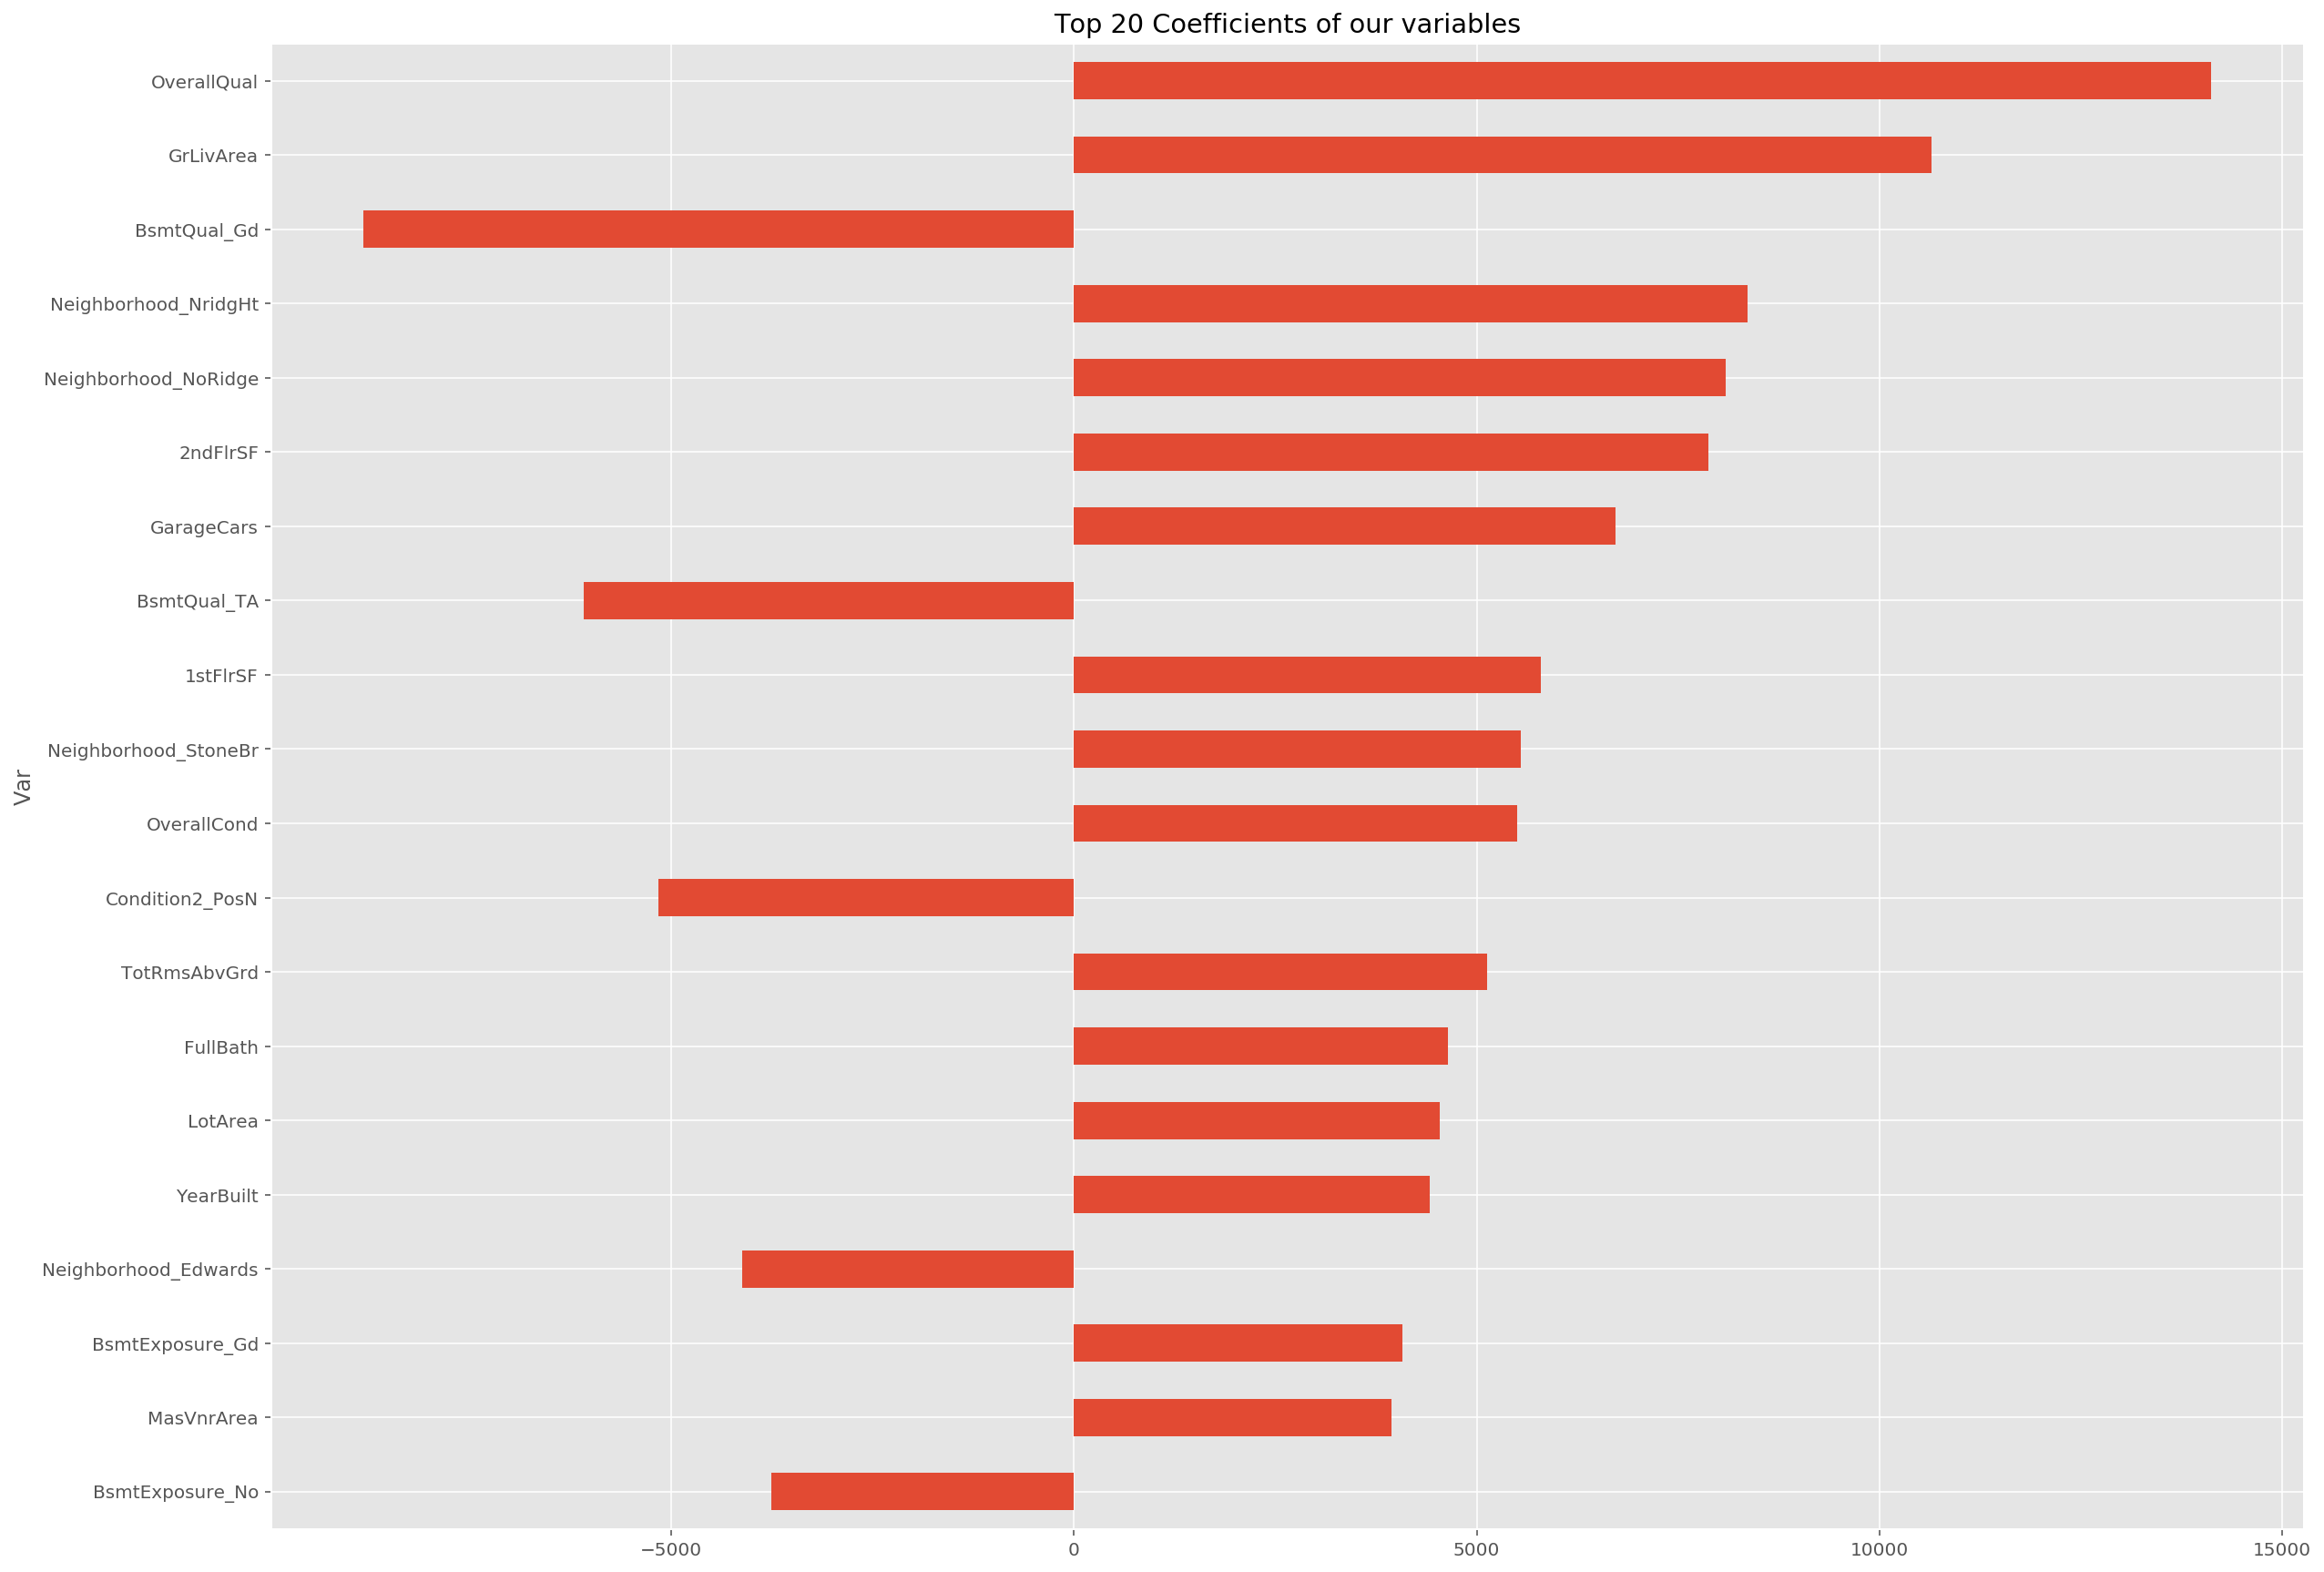

In [259]:
Coefficient.head(20).plot(kind='barh',x=0,y=1,figsize=(20,15),legend=False,title='Top 20 Coefficients of our variables', sort_columns=True)
plt.gca().invert_yaxis()
plt.show()


The Model work decently as we saw from the plot of the predictions. This last plot show which features influence the most our prediction.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovatable features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [260]:
house_renovable = house_residential[renov_feat]#,[ 'YrSold', 'SalePrice']]

In [261]:
house_test_target = house_residential[['YrSold', 'SalePrice']]

In [262]:
house_renovable.head()

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,BsmtCond,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,MiscVal,FireplaceQu,PoolQC
0,Gable,CompShg,VinylSd,VinylSd,Gd,TA,TA,GLQ,Unf,GasA,Ex,Y,SBrkr,0,Gd,Typ,RFn,TA,TA,0,NaN,NaN
1,Gable,CompShg,MetalSd,MetalSd,TA,TA,TA,ALQ,Unf,GasA,Ex,Y,SBrkr,0,TA,Typ,RFn,TA,TA,0,TA,NaN
2,Gable,CompShg,VinylSd,VinylSd,Gd,TA,TA,GLQ,Unf,GasA,Ex,Y,SBrkr,0,Gd,Typ,RFn,TA,TA,0,TA,NaN
3,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,Gd,ALQ,Unf,GasA,Gd,Y,SBrkr,0,Gd,Typ,Unf,TA,TA,0,Gd,NaN
4,Gable,CompShg,VinylSd,VinylSd,Gd,TA,TA,GLQ,Unf,GasA,Ex,Y,SBrkr,0,Gd,Typ,RFn,TA,TA,0,TA,NaN


In [263]:

house_renovable = pd.concat([house_renovable, house_test_target], axis=1)


In [264]:
house_renovable.head()

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,BsmtCond,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,MiscVal,FireplaceQu,PoolQC,YrSold,SalePrice
0,Gable,CompShg,VinylSd,VinylSd,Gd,TA,TA,GLQ,Unf,GasA,Ex,Y,SBrkr,0,Gd,Typ,RFn,TA,TA,0,NaN,NaN,2008,208500
1,Gable,CompShg,MetalSd,MetalSd,TA,TA,TA,ALQ,Unf,GasA,Ex,Y,SBrkr,0,TA,Typ,RFn,TA,TA,0,TA,NaN,2007,181500
2,Gable,CompShg,VinylSd,VinylSd,Gd,TA,TA,GLQ,Unf,GasA,Ex,Y,SBrkr,0,Gd,Typ,RFn,TA,TA,0,TA,NaN,2008,223500
3,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,Gd,ALQ,Unf,GasA,Gd,Y,SBrkr,0,Gd,Typ,Unf,TA,TA,0,Gd,NaN,2006,140000
4,Gable,CompShg,VinylSd,VinylSd,Gd,TA,TA,GLQ,Unf,GasA,Ex,Y,SBrkr,0,Gd,Typ,RFn,TA,TA,0,TA,NaN,2008,250000


# EDA in the new Dataframe

In [265]:
house_renovable.isnull().sum()[house_renovable.isnull().sum()!=0]

BsmtCond          37
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
GarageFinish      79
GarageQual        79
GarageCond        79
FireplaceQu      681
PoolQC          1443
dtype: int64

In [266]:
# Working on the Missing Value

In [267]:
house_renovable.Electrical =  house_renovable.Electrical.fillna(value=house_renovable.Electrical.mode()[0])
house_renovable[['BsmtCond','BsmtFinType1','BsmtFinType2']] =  house_renovable[['BsmtCond','BsmtFinType1','BsmtFinType2']].fillna(value='No Basement')
#house_renovable.BsmtFinType1 =  house_renovable.BsmtFinType1.fillna(value='No Basement')
#house_renovable.BsmtFinType2 =  house_renovable.BsmtFinType2.fillna(value='No Basement')
house_renovable[['GarageFinish','GarageQual','GarageCond']] =  house_renovable[['GarageFinish','GarageQual','GarageCond']].fillna(value='No Garage')
house_renovable.FireplaceQu = house_renovable.FireplaceQu.fillna(value='No Fireplace')
house_renovable.PoolQC = house_renovable.PoolQC.fillna(value='No Pool')




In [268]:
house_renovable.isnull().sum()

RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
ExterQual       0
ExterCond       0
BsmtCond        0
BsmtFinType1    0
BsmtFinType2    0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
LowQualFinSF    0
KitchenQual     0
Functional      0
GarageFinish    0
GarageQual      0
GarageCond      0
MiscVal         0
FireplaceQu     0
PoolQC          0
YrSold          0
SalePrice       0
dtype: int64

In [269]:
#Create Dummy variable
house_renovable_dum = pd.get_dummies(house_renovable, drop_first=True) #Creating a new dataframe with all the fixed variables and dummy variable when it is possible


In [270]:
house_renovable_dum.shape

(1450, 112)

In [271]:
house_renovable_dum.head(20)

,LowQualFinSF,MiscVal,YrSold,SalePrice,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool
0,0,0,2008,208500,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
1,0,0,2007,181500,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
2,0,0,2008,223500,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,0,0,2006,140000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
4,0,0,2008,250000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
5,0,700,2009,143000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
6,0,0,2007,307000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
7,0,350,2009,200000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
8,0,0,2008,129900,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
9,0,0,2008,118000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

# Train/Test split

In [272]:
#target = 'SalePrice'
house_renovable_train = house_renovable_dum[house_renovable_dum['YrSold'] < 2010].drop([target, 'YrSold'], axis=1)
house_renovable_test = house_renovable_dum[house_renovable_dum['YrSold'] == 2010].drop([target, 'YrSold'], axis =1)
y_renovable_train = (model_Ridge_all.predict(X_train_all)-y_resindetial_target_train)  
y_renovable_test = (model_Ridge_all.predict(X_test_all)-y_resindetial_target_test)

# Standardization

In [273]:
X_renovable_train = pd.DataFrame(scaler.fit_transform(house_renovable_train), columns=house_renovable_train.columns)
X_renovable_test = pd.DataFrame(scaler.transform(house_renovable_test), columns=house_renovable_test.columns)


# Run a new model

Using Ridge Model as in my previous model

In [274]:
#Checking the best alpha for Ridge method for big dataframe
renovable_RidgeCV = RidgeCV(alphas=np.logspace(0, 5, 100), cv=kf)
renovable_RidgeCV.fit(house_renovable_train, y_renovable_train)
#Finding the score using Ridge method
renovable_Ridge = Ridge(renovable_RidgeCV.alpha_)
mean_score_Ridge_renovable, Ridge_training_score_renovable, Ridge_test_score_renovable = model_fitter(renovable_Ridge, house_renovable_train, y_renovable_train, house_renovable_test, y_renovable_test)
print("Mean cross-validated training score:", mean_score_Ridge_renovable)
print("Training Score:", Ridge_training_score_renovable)
print("Test Score:", Ridge_test_score_renovable)

Mean cross-validated training score: 0.02625320226809611
Training Score: 0.09730295399572841
Test Score: 0.12632220160844043


In [275]:
y_train_predict = renovable_Ridge.predict(house_renovable_train)

In [276]:
y_test_predict = renovable_Ridge.predict(house_renovable_test)

In [277]:
y_predict_Ridge_train = model_Ridge_all.predict(X_train_all)

In [278]:
residual_train = pd.DataFrame(list(zip(y_resindetial_target_train, y_predict_Ridge_train, y_resindetial_target_train-y_predict_Ridge_train)), columns=['Predict', 'True', 'Residual'])


In [279]:
#y_test_predict

In [280]:
res_and_error = residual.copy()

In [281]:
res_and_error['error'] = y_test_predict

In [282]:
res_and_error.head()

,True,Predict,Residual,error
0,149000,163421.454442,-14421.454442,-1537.237460
1,154000,162232.339562,-8232.339562,2358.468270
2,134800,140520.514738,-5720.514738,383.123975
3,306000,303995.014711,2004.985289,1132.243553
4,165500,165163.638013,336.361987,-5852.503091


1) In this dataframe, we can see better the residual from the first model and the respective error on the residual. The error column predicts how much could change the residual from the previous model. The impact of all the renewable features from my predictions of the value of the house that I predicted in my previous model.

In [283]:
Coefficient_renovable = pd.DataFrame(list(zip(house_renovable_test.columns,renovable_Ridge.coef_,np.abs(renovable_Ridge.coef_) )), columns=['Var','Coef', 'Coef_abs'])


In [284]:
Coefficient_renovable.sort_values(by='Coef_abs', ascending=False, inplace=True)

In [285]:
Coefficient_renovable.head()

,Var,Coef,Coef_abs
13,RoofMatl_WdShngl,-9719.625278,9719.625278
81,KitchenQual_Gd,9287.515590,9287.515590
82,KitchenQual_TA,7330.351211,7330.351211
16,Exterior1st_BrkFace,-7192.060651,7192.060651
108,PoolQC_Gd,6744.797397,6744.797397


In [286]:
top_20 = Coefficient_renovable.head(20)

<Figure size 1440x1440 with 0 Axes>

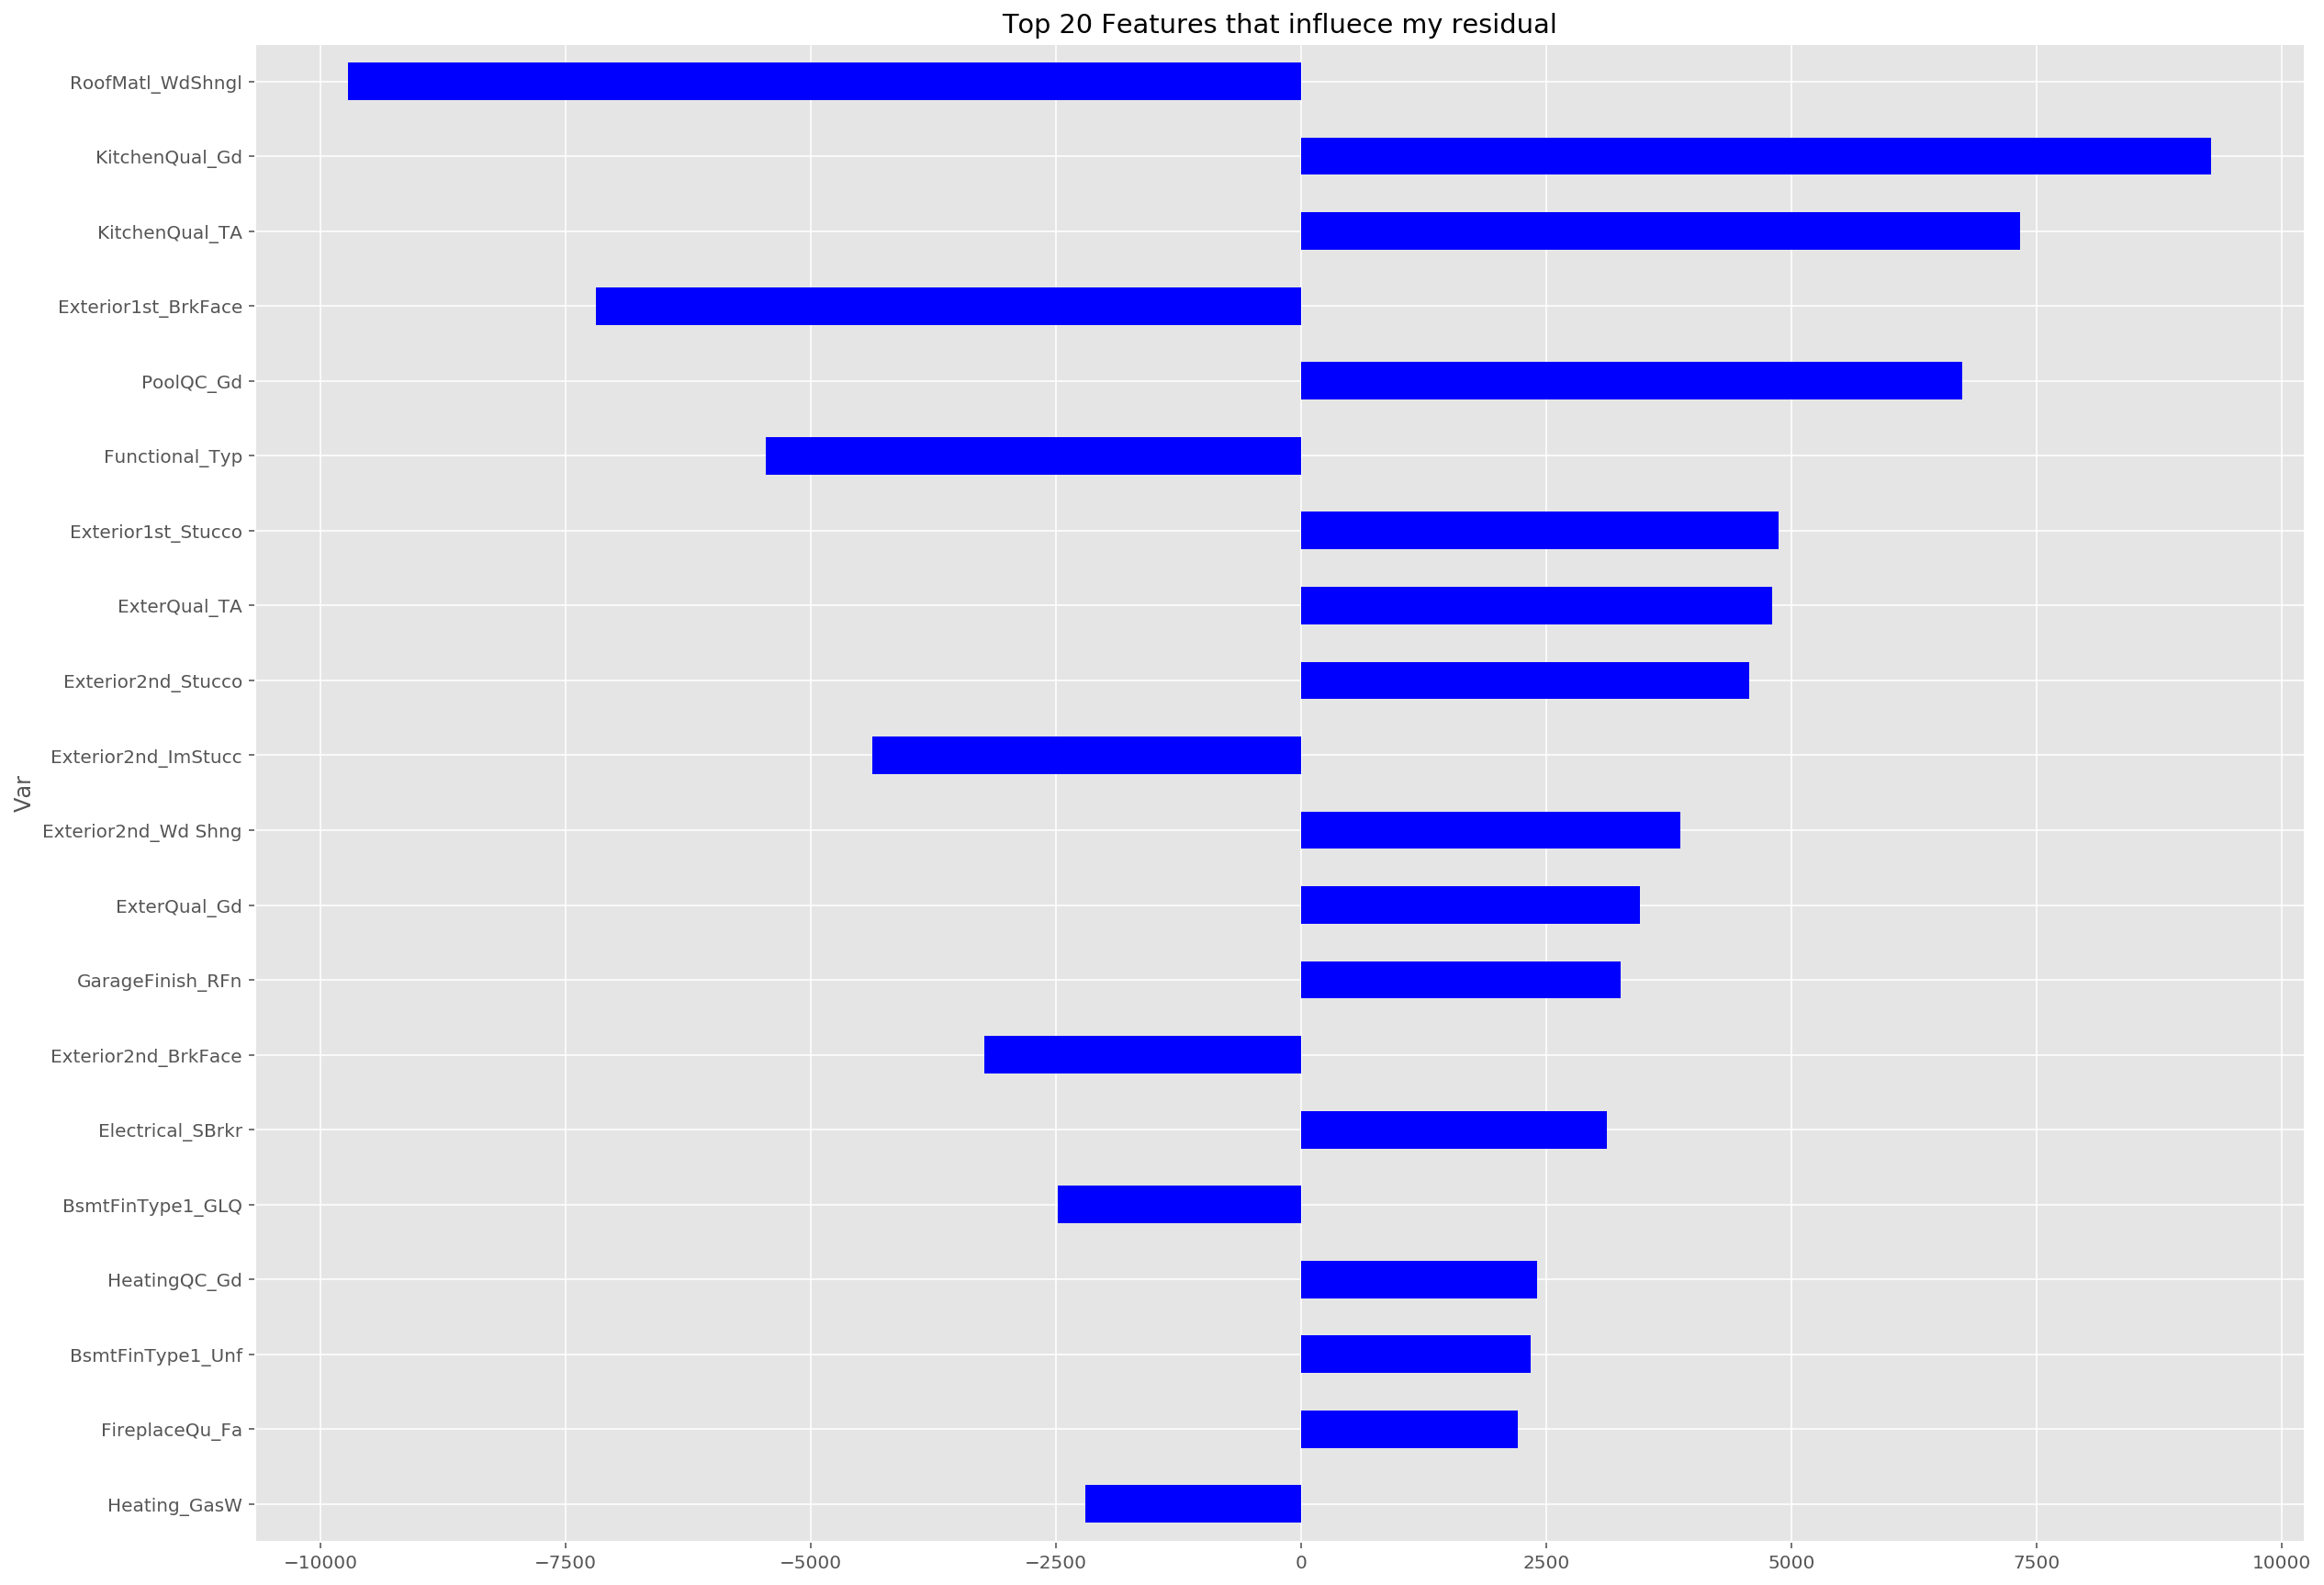

In [287]:
fig = plt.figure(figsize=(20,20))
top_20.plot(kind='barh',x=0,y=1,figsize=(20,15),legend=False,title='Top 20 Features that influece my residual', sort_columns=True,color="blue")
plt.gca().invert_yaxis()
plt.show()

2a) My second model has a very low score so it is not reliable at all. But if we "have to" use it and only this one, I can see from the coefficient who has the most positive or negative impact. 
The biggest coefficient in absolute value is the Roof made of Wood Shingles. The negative value means that this feature is something I could change to increase the value of my house. The big coefficient (in absolute value) means that it has a very strong impact on our prediction.
My second feature in absolute value is Good quality of the kitchen. 
This feature will change my prediction, making it bigger (so I would predict a more expensive house). But at the same time, I can't increase the price of the house changing the kitchen. I would buy a house with a good kitchen only if it is still underpriced.

2b) If I want to use both models, I need to buy the house where the difference between my residual and my error on the residual would be still negative, because it means I am buying an underpriced house, also considering the features that I can change with a small economic impact. Buying an underpriced house means that I will pay less than what it would worth, and I could make a good deal. And if the residual is negative (underprice) and it is still negative after subtracting the potential error (that I get from my second model) means that I could sell the house for more money, the price of my valuation, in the market also after spending money to fix the features. 
Going deep I could choose specific house with a specific coefficient in the best features to change (Like Roof in wood, Exterior in brick...), to increase even more my profit.


In [288]:
res_and_error['Diff_Residual_error'] = res_and_error.Residual - res_and_error.error


In [289]:
res_and_error['Possible_deal'] = res_and_error.Diff_Residual_error.map( lambda x: 'Yes' if x < 0 else 'No')


In [290]:
res_and_error.head()

,True,Predict,Residual,error,Diff_Residual_error,Possible_deal
0,149000,163421.454442,-14421.454442,-1537.237460,-12884.216982,Yes
1,154000,162232.339562,-8232.339562,2358.468270,-10590.807832,Yes
2,134800,140520.514738,-5720.514738,383.123975,-6103.638713,Yes
3,306000,303995.014711,2004.985289,1132.243553,872.741736,No
4,165500,165163.638013,336.361987,-5852.503091,6188.865079,No


In [291]:
res_and_error.rename(columns={'True':'SalePrice'}, inplace=True)

In [292]:
res_and_error.head()

,SalePrice,Predict,Residual,error,Diff_Residual_error,Possible_deal
0,149000,163421.454442,-14421.454442,-1537.237460,-12884.216982,Yes
1,154000,162232.339562,-8232.339562,2358.468270,-10590.807832,Yes
2,134800,140520.514738,-5720.514738,383.123975,-6103.638713,Yes
3,306000,303995.014711,2004.985289,1132.243553,872.741736,No
4,165500,165163.638013,336.361987,-5852.503091,6188.865079,No


In [293]:
new_house = house[house['YrSold'] == 2010]

In [294]:
new_house = pd.merge(new_house, res_and_error, on=['SalePrice'])

## NEW FINAL TEST DATAFRAME 

This new dataframe merge all my results. On the left of the Sale Price, you will find my prediction for that particular house, the possible error in my prediction and my final answer if could be possible make a deal if the particular house would be a new house that the agency should choose to deal or not.

In [295]:
new_house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Predict,Residual,error,Diff_Residual_error,Possible_deal
0,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000,163421.454442,-14421.454442,-1537.237460,-12884.216982,Yes
1,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000,162232.339562,-8232.339562,2358.468270,-10590.807832,Yes
2,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000,150784.011270,3215.988730,-7233.604216,10449.592946,No
3,1300,20,RL,75.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1959,1994,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,340,Rec,906,0,1246,GasA,Ex,Y,SBrkr,1246,0,0,1246,1,0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1959.0,RFn,1,305,TA,TA,Y,218,0,0,0,0,0,NaN,GdPrv,NaN,0,5,2010,WD,Normal,154000,162232.339562,-8232.339562,2358.468270,-10590.807832,Yes
4,1300,20,RL,75.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1959,1994,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,340,Rec,906,0,1246,GasA,Ex,Y,SBrkr,1246,0,0,1246,1,0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1959.0,RFn,1,305,TA,TA,Y,218,0,0,0,0,0,NaN,GdPrv,NaN,0,5,2010,WD,Normal,154000,150784.011270,3215.988730,-7233.604216,10449.592946,No
5,27,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1951,2000,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,Mn,BLQ,234,Rec,486,180,900,GasA,TA,Y,SBrkr,900,0,0,900,0,1,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,2005.0,Unf,2,576,TA,TA,Y,222,32,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,134800,140520.514738,-5720.514738,383.123975,-6103.638713,Yes
6,28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,No,GLQ,1218,Unf,0,486,1704,GasA,Ex,Y,SBrkr,1704,0,0,1704,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2008.0,RFn,3,772,TA,TA,Y,0,50,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000,303995.014711,2004.985289,1132.243553,872.741736,No
7,34,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,1018,Unf,0,380,1398,GasA,Gd,Y,SBrkr,1700,0,0,1700,0,1,1,1,4,1,Gd,6,Typ,1,Gd,Attchd,1959.0,RFn,2,447,TA,TA,Y,0,38,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500,165163.638013,336.361987,-5852.503091,6188.865079,No
8,39,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,Al

 3) A low score in my second model (0.126...) means that I still have a big error "unexplained". Basically, 12.6% of my residual could be explained from this my second model. It is not a reliable model, but being positive it is still better than my baseline.

4) I don't trust completely my double model, as I couldn't find a good second model. A reliable second model. 
It is a decent/good model to evaluate the value of the property itself (first model), but it is not that good to evaluate the condition of your house(second model). I would suggest an use of the 2 models in the cases where the residual of the first one are big enough to guarantee a clear deal or clear no deal in the buying, so to avoid a big impact in the decision from the second model.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. It is recommended to do some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [296]:
house_renovable.drop(['SalePrice','YrSold'], 1, inplace=True)

Using my 2 clean (No missing values) Dataframe from point 1 (Fixed features) and from point 2 (Renovable features). So I will re-create the old dataframe but with cleaning done

In [297]:
data = pd.concat([house_renovable, house_residential_fixed], axis=1)

In [298]:
data.head()

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,BsmtCond,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,MiscVal,FireplaceQu,PoolQC,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,Gable,CompShg,VinylSd,VinylSd,Gd,TA,TA,GLQ,Unf,GasA,Ex,Y,SBrkr,0,Gd,Typ,RFn,TA,TA,0,No Fireplace,No Pool,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,BrkFace,196.0,PConc,Gd,No,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,Attchd,2003.0,2,548,Y,0,61,0,0,0,0,No Fence,None,2,2008,WD,Normal,208500
1,Gable,CompShg,MetalSd,MetalSd,TA,TA,TA,ALQ,Unf,GasA,Ex,Y,SBrkr,0,TA,Typ,RFn,TA,TA,0,TA,No Pool,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,None,0.0,CBlock,Gd,Gd,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,Attchd,1976.0,2,460,Y,298,0,0,0,0,0,No Fence,None,5,2007,WD,Normal,181500
2,Gable,CompShg,VinylSd,VinylSd,Gd,TA,TA,GLQ,Unf,GasA,Ex,Y,SBrkr,0,Gd,Typ,RFn,TA,TA,0,TA,No Pool,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,BrkFace,162.0,PConc,Gd,Mn,486,0,434,920,920,866,1786,1,0,2,1,3,1,6,1,Attchd,2001.0,2,608,Y,0,42,0,0,0,0,No Fence,None,9,2008,WD,Normal,223500
3,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,Gd,ALQ,Unf,GasA,Gd,Y,SBrkr,0,Gd,Typ,Unf,TA,TA,0,Gd,No Pool,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,None,0.0,BrkTil,TA,No,216,0,540,756,961,756,1717,1,0,1,0,3,1,7,1,Detchd,1998.0,3,642,Y,0,35,272,0,0,0,No Fence,None,2,2006,WD,Abnorml,140000
4,Gable,CompShg,VinylSd,VinylSd,Gd,TA,TA,GLQ,Unf,GasA,Ex,Y,SBrkr,0,Gd,Typ,RFn,TA,TA,0,TA,No Pool,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,BrkFace,350.0,PConc,Gd,Av,655,0,490,1145,1145,1053,2198,1,0,2,1,4,1,9,1,Attchd,2000.0,3,836,Y,192,84,0,0,0,0,No Fence,None,12,2008,WD,Normal,250000


# Create and analyzing my Target

In [299]:
data['SaleCondition'] = data.SaleCondition.map(lambda x : 1 if x == 'Abnorml' else 0)

In [300]:
data.SaleCondition.value_counts()

0    1354
1      96
Name: SaleCondition, dtype: int64

In [301]:
data.SaleCondition.value_counts(normalize=True)

0    0.933793
1    0.066207
Name: SaleCondition, dtype: float64

In [302]:
data.rename(columns={'SaleCondition':'SaleCondition_Abnormal'}, inplace=True)

# Make Dummy variables

In [303]:
data_dummy = pd.get_dummies(data, drop_first=True) #Creating a new dataframe with all the fixed variables and dummy variable when it is possible


In [304]:
data_dummy = pd.get_dummies(data_dummy, columns = ['MSSubClass'],drop_first=True)#, 'OverallQual', 'OverallCond'], drop_first=True) #Creating a new dataframe with all the fixed variables and dummy variable when it is possible


In [305]:
data_dummy.head()

,LowQualFinSF,MiscVal,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleCondition_Abnormal,SalePrice,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,

In [306]:
y_abno = data_dummy.pop('SaleCondition_Abnormal')

In [339]:
y_abno.value_counts(normalize=True)

0    0.933793
1    0.066207
Name: SaleCondition_Abnormal, dtype: float64

# Train/Test split

Using the regular Train/Test split with the function from scikit-learn

In [340]:
Xtr, Xts, ytr, yts = train_test_split(data_dummy, y_abno, stratify = y_abno, test_size=0.3, random_state=1)

# Standardization

In [344]:
scaler = StandardScaler()
scaler.fit_transform(Xtr)
Xtr_std = scaler.fit_transform(Xtr)
Xts_std = scaler.transform(Xts)

In [349]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report


# Logistic Regression method

In [346]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(Xtr_std, ytr)
y_predict_test = model.predict(Xts_std)
model.score(Xts_std, yts)

0.8942528735632184

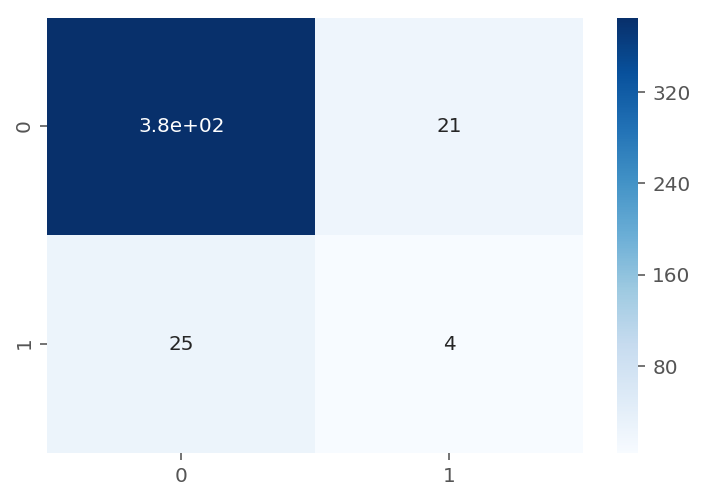

In [364]:
sns.heatmap(confusion_matrix(yts,model.predict(Xts_std)), annot=True,cmap='Blues')

In [350]:
print(classification_report(yts,model.predict(Xts_std)))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       406
           1       0.16      0.14      0.15        29

   micro avg       0.89      0.89      0.89       435
   macro avg       0.55      0.54      0.55       435
weighted avg       0.89      0.89      0.89       435



# GRIDSEARCH TO FIND THE BEST PARAMETERS

In [351]:
gs_params = {'penalty': ['l1', 'l2'],
             'solver': ['liblinear'],
             'C': np.logspace(-4, 4, 10)}

# create your gridsearch object
lr_gridsearch = GridSearchCV(model,
                             gs_params,
                             n_jobs=-1, 
                             cv=5, 
                             verbose=1,
                            )
lr_gridsearch.fit(Xtr_std, ytr)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'C': array([1.00000e-04, 7.74264e-04, 5.99484e-03, 4.64159e-02, 3.59381e-01,
       2.78256e+00, 2.15443e+01, 1.66810e+02, 1.29155e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [352]:
lr_gridsearch.best_score_

0.9339901477832512

In [353]:
lr_gridsearch.best_params_

{'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}

In [354]:
best_lr = lr_gridsearch.best_estimator_

In [355]:
lr_gridsearch.score(Xts_std, yts)

0.9333333333333333

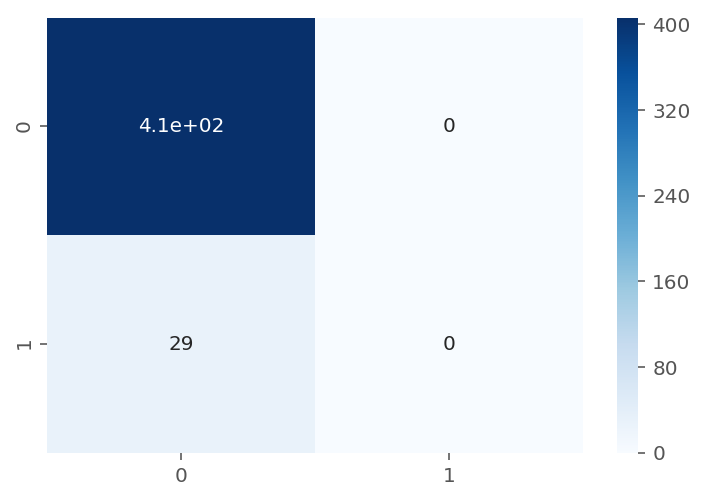

In [365]:
sns.heatmap(confusion_matrix(yts, lr_gridsearch.predict(Xts_std)), annot=True,cmap='Blues')

In [366]:
print(classification_report(yts, lr_gridsearch.predict(Xts_std)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       406
           1       0.00      0.00      0.00        29

   micro avg       0.93      0.93      0.93       435
   macro avg       0.47      0.50      0.48       435
weighted avg       0.87      0.93      0.90       435



In [367]:
best_lr.predict_proba(Xts_std)[50:60] #checking the probability

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])

This is the perfect case were the score itself says very little. 93% seems to be a pretty good score, but so it is the baseline. Our baseline is 93% as well. Checking the probability, we can see that every class receive 50% of probability for every case. It is not possible to understand or predict the abnormal sale with this data.